# GCash Topic Modeling Notebook
---

## Download and install requisite libraries and packages
---

In [1]:
import sys

!{sys.executable} -m pip install -U nltk
!{sys.executable} -m pip install -U mxnet
!{sys.executable} -m pip install -U numpy
!{sys.executable} -m pip install -U spacy
!{sys.executable} -m pip install -U pandas
!{sys.executable} -m pip install -U pillow
!{sys.executable} -m pip install -U plotly
!{sys.executable} -m pip install -U seaborn
!{sys.executable} -m pip install -U wordcloud
!{sys.executable} -m pip install -U matplotlib
!{sys.executable} -m pip install -U advertools
!{sys.executable} -m pip install -U yellowbrick
!{sys.executable} -m pip install -U autocorrect
!{sys.executable} -m pip install -U scikit-learn
!{sys.executable} -m pip install -U psutil requests
!{sys.executable} -m pip install -U datetime_truncate
!{sys.executable} -m pip install jupyterlab "ipywidgets>=7.5"
# !{sys.executable} -m pip install "notebook>=5.3" "ipywidgets>=7.5"

     |████████████████████████████████| 1.5 MB 10.6 MB/s eta 0:00:01
     |████████████████████████████████| 75 kB 7.2 MB/s  eta 0:00:01
  Attempting uninstall: nltk
    Found existing installation: nltk 3.4.4
    Uninstalling nltk-3.4.4:
      Successfully uninstalled nltk-3.4.4
     |████████████████████████████████| 46.9 MB 11.5 MB/s eta 0:00:01
     |████████████████████████████████| 12.9 MB 19.6 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 2.3 MB/s  eta 0:00:01
     |████████████████████████████████| 620 kB 55.5 MB/s eta 0:00:01
     |████████████████████████████████| 456 kB 63.1 MB/s eta 0:00:01
     |████████████████████████████████| 9.8 MB 72.7 MB/s eta 0:00:01
     |████████████████████████████████| 126 kB 72.0 MB/s eta 0:00:01
     |████████████████████████████████| 9.2 MB 58.6 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 6.5 MB/s  eta 0:00:01
     |████████████████████████████████| 20.6 MB 19.4 MB/s eta 0:00:01
  Attempting uninstall: plot

### JupyterLab renderer support
install the required JupyterLab extensions

In [2]:
!conda install -c conda-forge nodejs -y
!conda install -c plotly plotly-orca -y

Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - conda-forge/noarch::seaborn-base==0.11.1=pyhd8ed1ab_1
  - conda-forge/noarch::nbclassic==0.2.6=pyhd8ed1ab_0
  - conda-forge/linux-64::blaze==0.11.3=py36_0
  - conda-forge/linux-64::matplotlib==3.3.4=py36h5fab9bb_0
  - defaults/linux-64::_anaconda_depends==5.1.0=py36_2
  - conda-forge/noarch::jupyterlab==3.0.9=pyhd8ed1ab_0
  - conda-forge/noarch::python-language-server==0.36.2=pyhd8ed1ab_0
  - conda-forge/noarch::jupyterlab_server==2.3.0=pyhd8ed1ab_0
  - conda-forge/noarch::pyls-black==0.4.6=pyh9f0ad1d_0
  - conda-forge/linux-64::scikit-image==0.16.2=py36hb3f55d8_0
  - conda-forge/noarch::black==20.8b1=py_1
  - conda-forge/linux-64::anyio==2.1.0=py36h5fab9bb_0
  - conda-forge/linux-64::jupyter_server==1.4.1=py36h5fab9bb_0
  - conda-forge/linux-64::bokeh==2.2.3=py36h5fab9bb_0
  - conda-forge/noarch::numpydoc==1.1.0=py_1
  - conda-forg

In [3]:
!jupyter labextension install jupyterlab-plotly

Config option `kernel_spec_manager_class` not recognized by `InstallLabExtensionApp`.
[W 2021-06-29 03:24:13.253 LabApp] Config option `kernel_spec_manager_class` not recognized by `LabApp`.
Building jupyterlab assets (production, minimized)


In [1]:
import matplotlib.pyplot as plt
import plotly.express as px
import wordcloud as wc
import seaborn as sns
import pandas as pd 
import numpy as np
import mxnet as mx
import tarfile
import zipfile
import sklearn
import os
from datetime_truncate import truncate

## Import and prepare CSV files
---

In [140]:
gps_df = pd.read_csv('data/play_store_reviews.csv')
as_df = pd.read_csv('data/app_store_reviews.csv')
combined_df = pd.read_csv('data/combined_reviews.csv')

# convert date columns to datetime since dtypes aren't preserved in csv files
gps_df['at'] = pd.to_datetime(gps_df['at'])
as_df['date'] = pd.to_datetime(as_df['date'])
combined_df['date'] = pd.to_datetime(combined_df['date'])

In [141]:
# drop unnecessary columns
gps_df = gps_df.drop(['reviewId', 'userName', 'userImage', 'thumbsUpCount', 'reviewCreatedVersion', 'replyContent', 'repliedAt'], axis=1)
gps_df['type'] = 'play store'

gps_df.info()
print(display(gps_df.head(10)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110606 entries, 0 to 110605
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   content  110597 non-null  object        
 1   score    110606 non-null  int64         
 2   at       110606 non-null  datetime64[ns]
 3   type     110606 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.4+ MB


,content,score,at,type
0,Friendly user.,5,2020-08-05 06:23:06,play store
1,nice and easy,5,2021-05-07 12:10:07,play store
2,Amazing gcash,5,2021-04-11 06:13:37,play store
3,Nice apps ever last thing 🔥🔥🔥🔥🔥😍😍😍😍😍😘😘😘😘😘,5,2021-02-26 01:45:39,play store
4,Very convinience,5,2020-08-02 04:48:25,play store
5,wow,5,2020-03-30 03:43:02,play store
6,Excellent,5,2020-10-22 15:58:33,play store
7,Kkkkkkkk,5,2020-10-25 05:57:47,play store
8,Nice,5,2021-03-06 12:42:25,play store
9,vgood,5,2021-04-06 07:14:31,play store


None


In [142]:
as_df = as_df.drop(['title', 'userName', 'isEdited', 'developerResponse'], axis=1)
as_df['type'] = 'app store'

as_df.info()
print(display(as_df.head(10)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1669 non-null   datetime64[ns]
 1   review  1669 non-null   object        
 2   rating  1669 non-null   int64         
 3   type    1669 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 52.3+ KB


,date,review,rating,type
0,2021-02-17 06:32:13,Nakakadismaya naman. Dati okay naman yung gcas...,1,app store
1,2020-03-24 03:28:48,Don’t ever put your money here! My transaction...,1,app store
2,2020-09-15 16:58:57,Best as it has no fees. Wish they had rebates ...,5,app store
3,2020-06-07 09:31:21,Gcash has been very helpful in many ways to me...,1,app store
4,2020-09-25 09:19:47,I USED METROBANK INSTAPAY TO CASH IN BUT UNTIL...,1,app store
5,2021-01-31 02:22:08,My account was charged without the transaction...,1,app store
6,2020-07-22 08:00:54,you've alway have deductions everytime we have...,1,app store
7,2020-04-20 19:30:59,So the first time I used this app they ask me ...,1,app store
8,2020-06-16 13:13:06,please fix this problem for the first time use...,1,app store
9,2020-12-09 06:42:52,I sent wrong number pls help me to refund my m...,5,app store


None


In [ ]:
# init empty DF
combined_df = pd.DataFrame()

# populate lists
date_lst = gps_df['at'].values.tolist() + as_df['date'].values.tolist()
review_lst = gps_df['content'].values.tolist() + as_df['review'].values.tolist()
rating_lst = gps_df['score'].values.tolist() + as_df['rating'].values.tolist()
type_lst = gps_df['type'].values.tolist() + as_df['type'].values.tolist()

# populate DF
combined_df['date'] = date_lst
combined_df['date'] = pd.to_datetime(combined_df['date'])
combined_df['review'] = review_lst
combined_df['rating'] = rating_lst
combined_df['type'] = type_lst

# shuffle rows
combined_df = combined_df.sample(frac=1).reset_index(drop=True)

# drop rows that have NULL entries
combined_df = combined_df.dropna()

# drop rows that have duplicates
combined_df = combined_df.drop_duplicates()

combined_df.info()
print(display(combined_df.head(10)))

### Export combined_df as CSV

In [ ]:
combined_df.to_csv('data/combined_reviews.csv', index=False)

### Import CSV files

In [2]:
combined_df = pd.read_csv('data/combined_reviews.csv')

# convert date columns to datetime since dtypes aren't preserved in csv files
combined_df['date'] = pd.to_datetime(combined_df['date'])

# create and append month column
combined_df['month'] = combined_df['date'].apply(lambda x: truncate(x, 'month').date())
combined_df['month'] = pd.to_datetime(combined_df['month'])

combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112264 entries, 0 to 112263
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    112264 non-null  datetime64[ns]
 1   review  112264 non-null  object        
 2   rating  112264 non-null  int64         
 3   type    112264 non-null  object        
 4   month   112264 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 4.3+ MB


In [71]:
complete_df = pd.read_csv('data/complete_reviews.csv')

# convert date columns to datetime since dtypes aren't preserved in csv files
complete_df['date'] = pd.to_datetime(complete_df['date'])

# create and append month column
complete_df['month'] = complete_df['date'].apply(lambda x: truncate(x, 'month').date())
complete_df['month'] = pd.to_datetime(complete_df['month'])

complete_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112264 entries, 0 to 112263
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    112264 non-null  datetime64[ns]
 1   review  112264 non-null  object        
 2   rating  112264 non-null  int64         
 3   type    112264 non-null  object        
 4   month   112264 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 4.3+ MB


## Exploratory Data Analysis
---

In [15]:
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# set default renderer
pio.renderers.default = "iframe"

# disable false positive warning
pd.options.mode.chained_assignment = None  # default='warn'

ax_1 = combined_df.loc[(combined_df['type'] == 'play store') & (combined_df['rating'] == 1)]
ax_5 = combined_df.loc[(combined_df['type'] == 'play store') & (combined_df['rating'] == 5)]
ax_1 = ax_1.sort_values(by=['date'])
ax_5 = ax_5.sort_values(by=['date'])
ax_1['cumsum'] = ax_1['rating'].eq(1).cumsum()
ax_5['cumsum'] = ax_5['rating'].eq(5).cumsum()
ax_1_ratings = ax_1.groupby(['month', 'rating'])['review'].count().reset_index()
ax_5_ratings = ax_5.groupby(['month', 'rating'])['review'].count().reset_index()

bx_1 = combined_df.loc[(combined_df['type'] == 'app store') & (combined_df['rating'] == 1)]
bx_5 = combined_df.loc[(combined_df['type'] == 'app store') & (combined_df['rating'] == 5)]
bx_1 = bx_1.sort_values(by=['date'])
bx_5 = bx_5.sort_values(by=['date'])
bx_1['cumsum'] = bx_1['rating'].eq(1).cumsum()
bx_5['cumsum'] = bx_5['rating'].eq(5).cumsum()
bx_1_ratings = bx_1.groupby(['month', 'rating'])['review'].count().reset_index()
bx_5_ratings = bx_5.groupby(['month', 'rating'])['review'].count().reset_index()

fig = make_subplots(
    rows=3, 
    cols=2, 
    shared_xaxes=True,
    vertical_spacing=0.05,
    subplot_titles=("Play Store Review Count Over Time (01/2020 - 06/2021)", "App Store Review Count Over Time (01/2020 - 06/2021)")
)

# Play Store
fig.add_trace(
    go.Scatter(
        x=ax_1['date'],
        y=ax_1['cumsum'],
        name='1-star Play Store',
        marker=dict(color='#4c84ed')
    ),
    row=1, 
    col=1
)
fig.add_trace(
    go.Histogram(
        x=ax_1['date'],
        y=ax_1['rating'],
        name='1-star Play Store',
        marker=dict(color='#4c84ed')
    ),
    row=2, 
    col=1
)
fig.add_trace(
    go.Scatter(
        x=ax_1_ratings['month'],
        y=ax_1_ratings['review'],
        name='1-star Play Store',
        marker=dict(color='#4c84ed')
    ),
    row=3, 
    col=1
)
fig.add_trace(
    go.Scatter(
        x=ax_5['date'],
        y=ax_5['cumsum'],
        name='5-star Play Store',
        marker=dict(color='#ed4c4c')
    ),
    row=1, 
    col=1
)
fig.add_trace(
    go.Histogram(
        x=ax_5['date'],
        y=ax_5['rating'],
        name='5-star Play Store',
        marker=dict(color='#ed4c4c')
    ),
    row=2, 
    col=1
)
fig.add_trace(
    go.Scatter(
        x=ax_5_ratings['month'],
        y=ax_5_ratings['review'],
        name='5-star Play Store',
        marker=dict(color='#ed4c4c')
    ),
    row=3, 
    col=1
)

# App Store
fig.add_trace(
    go.Scatter(
        x=bx_1['date'],
        y=bx_1['cumsum'],
        name='1-star App Store',
        marker=dict(color='#4c84ed')
    ),
    row=1, 
    col=2
)
fig.add_trace(
    go.Histogram(
        x=bx_1['date'],
        y=bx_1['rating'],
        name='1-star App Store',
        marker=dict(color='#4c84ed')
    ),
    row=2, 
    col=2
)
fig.add_trace(
    go.Scatter(
        x=bx_1_ratings['month'],
        y=bx_1_ratings['review'],
        name='1-star App Store',
        marker=dict(color='#4c84ed')
    ),
    row=3, 
    col=2
)
fig.add_trace(
    go.Scatter(
        x=bx_5['date'],
        y=bx_5['cumsum'],
        name='5-star App Store',
        marker=dict(color='#ed4c4c')
    ),
    row=1, 
    col=2
)
fig.add_trace(
    go.Histogram(
        x=bx_5['date'],
        y=bx_5['rating'],
        name='5-star App Store',
        marker=dict(color='#ed4c4c')
    ),
    row=2, 
    col=2
)
fig.add_trace(
    go.Scatter(
        x=bx_5_ratings['month'],
        y=bx_5_ratings['review'],
        name='5-star App Store',
        marker=dict(color='#ed4c4c')
    ),
    row=3, 
    col=2
)

# Update yaxis properties
fig.update_yaxes(title_text="Review Count")
fig.show()

# for graph to persist outside session
# fig.show(renderer="svg", width=1750, height=800)

### Hour of the day
---

In [235]:
ax = ax.sort_values(by=['date'])

# df = df.groupby([df['Date'].dt.hour, 'weekday'])['Cyclists'].sum().unstack().plot()

gps_avg_rating_hr = ax.groupby(ax['date'].dt.hour)['rating'].mean().reset_index().rename(
    columns = {'date' : 'hour'}
)
gps_avg_rating_hr.head()

,hour,rating
0,0,4.011386
1,1,3.893908
2,2,3.838791
3,3,3.835908
4,4,3.863145


In [236]:
bx = bx.sort_values(by=['date'])

# df = df.groupby([df['Date'].dt.hour, 'weekday'])['Cyclists'].sum().unstack().plot()

as_avg_rating_hr = bx.groupby(bx['date'].dt.hour)['rating'].mean().reset_index().rename(
    columns = {'date' : 'hour'}
)
as_avg_rating_hr.head()

,hour,rating
0,0,1.645161
1,1,1.412371
2,2,1.504854
3,3,1.484848
4,4,1.503937


### Day of the week
---

In [248]:
ax = ax.sort_values(by=['date'])

days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

gps_avg_rating_day = ax.groupby(ax['date'].dt.day_name())['rating'].mean().reindex(days).reset_index().rename(
    columns = {'date' : 'day'}
)
gps_avg_rating_day

,day,rating
0,Monday,3.923154
1,Tuesday,3.894769
2,Wednesday,4.066080
3,Thursday,3.929321
4,Friday,3.849115
5,Saturday,3.961799
6,Sunday,3.979864


In [264]:
bx = bx.sort_values(by=['date'])

# df = df.groupby([df['Date'].dt.hour, 'weekday'])['Cyclists'].sum().unstack().plot()

as_avg_rating_day = bx.groupby(bx['date'].dt.day_name())['rating'].mean().reindex(days).reset_index().rename(
    columns = {'date' : 'day'}
)
as_avg_rating_day

,day,rating
0,Monday,1.348624
1,Tuesday,1.498113
2,Wednesday,1.514056
3,Thursday,1.385542
4,Friday,1.563177
5,Saturday,1.401914
6,Sunday,1.336634


In [276]:
fig = make_subplots(
    rows=2, 
    cols=2, 
#     shared_xaxes=True,
#     shared_yaxes=True,
    vertical_spacing=0.2,
    subplot_titles=("Play Store Average Rating per Hour", "App Store Average Rating per Hour", \
                   "Play Store Average Rating per Day", "App Store Average Rating per Day")
)

fig.add_trace(
    go.Scatter(
        x=gps_avg_rating_hr['hour'],
        y=gps_avg_rating_hr['rating'],
        name='Play Store',
        marker=dict(color='#ed4c4c')
    ),
    row=1, 
    col=1
)

fig.add_trace(
    go.Scatter(
        x=as_avg_rating_hr['hour'],
        y=as_avg_rating_hr['rating'],
        name='App Store',
        marker=dict(color='#4c84ed')
    ),
    row=1, 
    col=2
)

fig.add_trace(
    go.Scatter(
        x=gps_avg_rating_day['day'],
        y=gps_avg_rating_day['rating'],
        name='Play Store',
        marker=dict(color='#ed4c4c')
    ),
    row=2, 
    col=1
)

fig.add_trace(
    go.Scatter(
        x=as_avg_rating_day['day'],
        y=as_avg_rating_day['rating'],
        name='App Store',
        marker=dict(color='#4c84ed')
    ),
    row=2, 
    col=2
)

fig.update_layout(title_text="Time period: (01/2020 - 06/2021)")
# Update yaxis and xaxis properties
fig.update_yaxes(title_text="Average Rating")
fig.update_xaxes(dtick=1)
fig.show()

In [277]:
fig = make_subplots(
    rows=2, 
    cols=2, 
#     shared_xaxes=True,
    shared_yaxes=True,
    vertical_spacing=0.2,
    subplot_titles=("Play Store Average Rating per Hour", "App Store Average Rating per Hour", \
                   "Play Store Average Rating per Day", "App Store Average Rating per Day")
)

fig.add_trace(
    go.Scatter(
        x=gps_avg_rating_hr['hour'],
        y=gps_avg_rating_hr['rating'],
        name='Play Store',
        marker=dict(color='#ed4c4c')
    ),
    row=1, 
    col=1
)

fig.add_trace(
    go.Scatter(
        x=as_avg_rating_hr['hour'],
        y=as_avg_rating_hr['rating'],
        name='App Store',
        marker=dict(color='#4c84ed')
    ),
    row=1, 
    col=2
)

fig.add_trace(
    go.Scatter(
        x=gps_avg_rating_day['day'],
        y=gps_avg_rating_day['rating'],
        name='Play Store',
        marker=dict(color='#ed4c4c')
    ),
    row=2, 
    col=1
)

fig.add_trace(
    go.Scatter(
        x=as_avg_rating_day['day'],
        y=as_avg_rating_day['rating'],
        name='App Store',
        marker=dict(color='#4c84ed')
    ),
    row=2, 
    col=2
)

fig.update_layout(title_text="Time period: (01/2020 - 06/2021)")
# Update yaxis and xaxis properties
fig.update_yaxes(title_text="Average Rating")
fig.update_xaxes(dtick=1)
fig.show()

In [85]:
# init empty DF
cx = pd.DataFrame()

# Collect and store all App Store reviews in a temporary DF
cx = combined_df
cx['Review word count'] = cx['review'].str.split().str.len()
print(f"\nMean word count: {cx['Review word count'].mean()}")

fig = px.histogram(
    cx, 
    x='Review word count',
    color='rating',
    labels=['Word count', 'Review count'],
    title='Review Word Count of App Store and Play Store Reviews',
    barmode='group',
    width=1000, 
    height=500
)
fig.show()

# for graph to persist outside session
# fig.show(renderer="png")


Mean word count: 8.829232879640847


### Play Store

In [83]:
# init empty DF
ax = pd.DataFrame()

# Collect and store all Play Store reviews in a temporary DF
# ax = combined_df.loc[(combined_df['type'] == 'play store') & (combined_df['date'] >= '2021-04-09 00:00:00') & (combined_df['date'] <= '2021-04-12 00:00:00')]
ax = combined_df.loc[(combined_df['type'] == 'play store')]
ax['Review word count'] = ax['review'].str.split().str.len()

ax_1['Review word count'] = ax_1['review'].str.split().str.len()
ax_5['Review word count'] = ax_5['review'].str.split().str.len()
print(f"Play Store reviews mean word count: {ax['Review word count'].mean()}")
print(f"\n1-star reviews mean word count: {ax_1['Review word count'].mean()}")
print(f"5-star reviews mean word count: {ax_5['Review word count'].mean()}")

fig = px.histogram(
    ax, 
    x='Review word count',
    color='rating',
    labels=['Word count', 'Review count'],
    title='Review Word Count of Play Store Reviews',
    barmode='group',
    width=1000, 
    height=500
)
fig.show()

# for graph to persist outside session
# fig.show(renderer="png")

Play Store reviews mean word count: 8.428898232288983

1-star reviews mean word count: 20.143735825716444
5-star reviews mean word count: 4.245407581019228


### App Store

In [84]:
# init empty DF
bx = pd.DataFrame()

# Collect and store all App Store reviews in a temporary DF
bx = combined_df.loc[(combined_df['type'] == 'app store')]
bx['Review word count'] = bx['review'].str.split().str.len()

bx_1['Review word count'] = bx_1['review'].str.split().str.len()
bx_5['Review word count'] = bx_5['review'].str.split().str.len()
print(f"App Store reviews mean word count: {bx['Review word count'].mean()}")
print(f"\n1-star reviews mean word count: {bx_1['Review word count'].mean()}")
print(f"5-star reviews mean word count: {bx_5['Review word count'].mean()}")

fig = px.histogram(
    bx, 
    x='Review word count',
    color='rating',
    labels=['Word count', 'Review count'],
    title='Review Word Count of App Store Reviews',
    barmode='group',
    width=1000, 
    height=500
)
fig.show()

# for graph to persist outside session
# fig.show(renderer="png")

App Store reviews mean word count: 35.35710005991612

1-star reviews mean word count: 35.88611859838275
5-star reviews mean word count: 31.113513513513514


## Convert plain text to bag-of-words (BOW)
---

In [3]:
import re
import nltk
import spacy 
import advertools as adv
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
from spacy.lang.en.stop_words import STOP_WORDS
from nltk.corpus import wordnet, words, stopwords

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

# concatenate english and tagalog stopwords into one list
stop_words = stopwords.words('english') + list(adv.stopwords['tagalog']) + \
            ['gcash', 'could', 'doe', 'might', 'must', 'need', 'sha', \
             'would', 'far', 'nag', 'already', 'always', 'app', 'cant', \
             'dont', 'even', 'get', 'please', 'say', 'still', 'try', 'use', \
             'yung', 'day', 'keep', 'lang', 'like', 'make', 'nyo', 'the', 'to', \
             'ive', 'naman', 'one', 'take', 'fully', 'also', 'app..', \
             'give', 'much', 'okay', 'pag', 'sana', 'star', 'sya', 'thank', \
             'usefull', 'verry', 'wala', 'want', 'way', 'well', 'wow', 'didnt', \
             'every', 'guy', 'hope', 'kayo', 'know', 'let', 'link', 'mag', 'many', \
             'message', 'never', 'nothing', 'open', 'put', 'really', 'seem', 'start', \
             'thing', 'whenever', 'wont', 'wrong', 'yet', 'almost', 'anymore', 'back', \
             'come', 'doesnt', 'especially', 'everytime', 'first', 'globe', 'last', \
             'month', 'new', 'niyo', 'since', 'something', 'think', 'thru', 'ung', \
             'without', 'suppose', 'tapos', 'another', 'anything', 'u', 'thats', \
             'via', 'etc', 'everything', 'everywhere', 'find', 'io', 'life', \
             'list', 'lot', 'maybe', 'meter', 'next' , 'past', 'phone', 'pls', \
             'plus', 'point', 'pwede', 'see', 'show', 'sometimes', 'team', 'whats', \
             'wish', 'year', 'gamitin', 'girl', 'hand', 'happen', 'hello', 'high', \
             'however', 'hurt', 'though', 'true', 'usually', 'screen', 'soon', 'acc', \
             'add', 'yun', 'yes', 'youre', 'coz', 'acct', 'agad', 'line', 'long', 'today', \
             'go', 'abd', 'kna', 'luv', 'kna', 'god', 'wlang', 'yeah', 'id', 'idk', 'iam', \
            'ill', 'ina', 'padin', 'kahit', 'pede', 'nang', 'supper', 'khit', 'kahit']

# Helper function to lemmatize with part of speech (POS) tag
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

token_pattern = re.compile(r"(?u)\b\w\w+\b")

class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(word, get_wordnet_pos(word)) for word in word_tokenize(doc) if len(word) >= 3 and re.match("[a-z].*", word) and re.match(token_pattern, word)]

[nltk_data] Downloading package punkt to /home/ec2-user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ec2-user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/ec2-user/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### Tokenize and lemmatize review data

In [84]:
import time
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

main_df = combined_df.loc[(combined_df['rating'] == 1) & (combined_df['type'] == 'play store')]

# split data to training (70%), validation (15%), and test (15%) datasets
train_data, val_data = train_test_split(main_df, train_size=0.7, random_state=42)
train_data, test_data = train_test_split(train_data, train_size=0.7, random_state=42) 

print(f'Training, validation, and test data shapes:\n{train_data.shape}')
print(val_data.shape)
print(test_data.shape)

complete_batch = main_df.review.values.tolist()
first_batch = train_data.review.values.tolist()
second_batch = val_data.review.values.tolist()
third_batch = test_data.review.values.tolist()

vocab_size = 1000

print('\nTokenizing and counting, this may take a few minutes...')
start_time = time.time()
vectorizer = CountVectorizer(
    input='content', 
    analyzer='word', 
    stop_words=stop_words,
    tokenizer=LemmaTokenizer(),
    strip_accents='ascii',
    max_features=vocab_size, 
#     ngram_range=(2, 3),
    max_df=0.95, # maximum document frequency of 95% of documents
    min_df=2 # minimum document frequency of 2 documents
)

# Learn the vocabulary dictionary from the training data and return a document-term matrix
train_vectors = vectorizer.fit_transform(first_batch)
vocab_map = vectorizer.vocabulary_
vocab_list = vectorizer.get_feature_names()
removed_words = vectorizer.get_stop_words()
vocab_size = len(vocab_list)

# Extract token counts out of validation and test datasets using the vocabulary fitted with fit 
val_vectors = vectorizer.transform(second_batch)
test_vectors = vectorizer.transform(third_batch)

complete_vectors = vectorizer.transform(complete_batch)

print(f'\nTraining rows, vocab length:\n{train_vectors.shape}')
print('\nVocab size:', vocab_size)
print(f'\nVocab list:\n{vocab_list}')
print('\nDone. Time elapsed: {:.2f}s'.format(time.time() - start_time))

Training, validation, and test data shapes:
(14259, 5)
(8731, 5)
(6112, 5)

Tokenizing and counting, this may take a few minutes...

Training rows, vocab length:
(14259, 1000)

Vocab size: 1000

Vocab list:
['able', 'accept', 'accepted', 'access', 'accessible', 'accnt', 'account', 'action', 'actually', 'ad', 'additional', 'address', 'advise', 'agent', 'ago', 'akala', 'akong', 'alam', 'allow', 'although', 'amaze', 'amount', 'android', 'angry', 'annoy', 'annoyed', 'anong', 'answer', 'antagal', 'anu', 'anyone', 'anyway', 'appear', 'applicable', 'application', 'apply', 'approve', 'apps', 'april', 'araw', 'around', 'arrive', 'arte', 'asap', 'ask', 'asks', 'assist', 'assistance', 'ata', 'atleast', 'atm', 'attempt', 'authentication', 'auto', 'automatic', 'automatically', 'avail', 'available', 'away', 'awful', 'ayaw', 'ayos', 'ayus', 'ayusin', 'bad', 'badly', 'badtrip', 'bagal', 'bagong', 'baka', 'balance', 'balik', 'bang', 'bank', 'banking', 'barcode', 'basic', 'basta', 'basura', 'bat', 'bawa

In [8]:
# test_df = combined_df.loc[(combined_df['type'] == 'play store')]
test_df = combined_df
test_df

,date,review,rating,type,month
0,2020-04-30 08:08:09,app not working,1,play store,2020-04-01
1,2020-03-12 11:22:57,Ok,5,play store,2020-03-01
2,2020-05-26 09:55:01,"I used to like this app until now, I lost 999....",1,play store,2020-05-01
3,2021-04-08 13:27:45,"Palawan cash out,are gone,",1,play store,2021-04-01
4,2020-07-31 05:11:41,Convinient app... very accessible to all payme...,5,play store,2020-07-01
...,...,...,...,...,...
112259,2020-10-01 05:44:46,Why i cant update my gcash ?,1,play store,2020-10-01
112260,2021-02-19 07:11:15,Its good and nice,5,play store,2021-02-01
112261,2021-05-07 23:18:08,Very stressful and poor service in terms of RE...,1,play store,2021-05-01
112262,2021-06-02 01:53:22,Fastest transaction ever,5,play store,2021-06-01


## CountVectorizer Visualizations
---

In [22]:
vectorizer = CountVectorizer(
    input='content', 
    analyzer='word', 
    stop_words=stop_words,
    tokenizer=LemmaTokenizer(),
    strip_accents='ascii',
    max_features=vocab_size, 
    ngram_range=(2, 2),
    max_df=0.95, # maximum document frequency of 95% of documents
    min_df=2 # minimum document frequency of 2 documents
)

In [23]:
from sklearn.manifold import TSNE

ct = 1000
tsne = TSNE(n_components=2, random_state=0)
inp = test_df.review.values.tolist()

X = vectorizer.fit_transform(inp[:ct])
projections = tsne.fit_transform(X)

fig = px.scatter(
    projections, x=0, y=1,
    color=test_df['rating'][:ct], labels={'color': 'rating'}
)
fig.show()

In [24]:
tsne = TSNE(n_components=3, random_state=0)

projections = tsne.fit_transform(X)

fig = px.scatter_3d(
    projections, x=0, y=1, z=2,
    color=test_df['rating'][:ct], labels={'color': 'rating'}
)
fig.update_traces(marker_size=8)
fig.show()

## TfidfVectorizer Visualizations
---

In [25]:
vectorizer = TfidfVectorizer(
    input='content', 
    analyzer='word', 
    stop_words=stop_words,
    tokenizer=LemmaTokenizer(),
    strip_accents='ascii',
    max_features=vocab_size, 
    ngram_range=(2, 2),
    max_df=0.95, # maximum document frequency of 95% of documents
    min_df=2 # minimum document frequency of 2 documents
)

In [26]:
from sklearn.manifold import TSNE

ct = 1000
tsne = TSNE(n_components=2, random_state=0)
inp = test_df.review.values.tolist()

X = vectorizer.fit_transform(inp[:ct])
projections = tsne.fit_transform(X)

fig = px.scatter(
    projections, x=0, y=1,
    color=test_df['rating'][:ct], labels={'color': 'rating'}
)
fig.show()

In [27]:
tsne = TSNE(n_components=3, random_state=0)

projections = tsne.fit_transform(X)

fig = px.scatter_3d(
    projections, x=0, y=1, z=2,
    color=test_df['rating'][:ct], labels={'color': 'rating'}
)
fig.update_traces(marker_size=8)
fig.show()

### Sort mapping of terms to feature indices.

In [51]:
vocab_map_items = vocab_map.items()
sorted_vocab_items = sorted(vocab_map_items)

aux_lst = []

for i in range(len(sorted_vocab_items)):
    aux_lst.append(sorted_vocab_items[i][0])

### Store in a text file

In [52]:
with open(f'data/vocab.txt', 'w') as f:
    for item in aux_lst:
        f.write("%s\n" % item)

### Verify results
---

### Training

In [53]:
print(f'\noriginal text:')
for i in range(5):
    print(f'\n{[i]} - {train_data.review.values.tolist()[i]}')


original text:

[0] - I have ordered a mastercard about 2 months ago and until now I haven't received any card yet

[1] - cant open

[2] - recommended ID on verified, why I cant use student ID? what is going on gcash? I uninstall gcash then I download it again, but almost 1hr of waiting it's still loading gcash cant download, please fix ur issue or error. Thankyou!

[3] - Always having trouble when paying to teller, so disgusting. Later I decided to pay it in cash.

[4] - bakit d ko ma update ang gcash ko..sayang ang 500 sa loob d ko magamit,d ako maka sent ng pera sa ibang gcash


In [54]:
import random 

value = random.randrange(0, 4)
# value = 0
print(f'index: {value}')
print(f'\noriginal text:\n{train_data.review.values.tolist()[value]}')
print(f'\nvectorized text:\n{train_vectors[value].todense()}')

index: 2

original text:
recommended ID on verified, why I cant use student ID? what is going on gcash? I uninstall gcash then I download it again, but almost 1hr of waiting it's still loading gcash cant download, please fix ur issue or error. Thankyou!

vectorized text:
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [55]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

train_counts = pd.DataFrame(
    train_vectors[:5].toarray(),
    columns=vocab_list
)

train_counts

,able,accept,accepted,access,accessible,accnt,account,action,actually,ad,additional,address,advise,agent,ago,akala,akong,alam,allow,although,amaze,amount,android,angry,annoy,annoyed,anong,answer,antagal,anu,anyone,anyway,appear,applicable,application,apply,approve,apps,april,araw,around,arrive,arte,asap,ask,asks,assist,assistance,ata,atleast,atm,attempt,authentication,auto,automatic,automatically,avail,available,away,awful,ayaw,ayos,ayus,ayusin,bad,badly,badtrip,bagal,bagong,baka,balance,balik,bang,bank,banking,barcode,basic,basta,basura,bat,bawas,bayad,bcoz,bdo,become,becomes,begin,believe,best,big,bigla,biglang,bigyan,bilis,bill,biller,bit,bkit,blah,block,blur,blurry,bobo,bother,bought,bpi,bring,broken,bug,buggy,bulok,business,busy,buti,button,buwan,buy,buying,bwesit,bwiset,bwisit,call,cam,camera,cancel,capture,card,care,case,cash,cash-in,cashback,cashed,cashin,cashless,cause,cellphone,center,change,charge,chat,check,checked,choice,choose,cimb,claim,class,clear,clearly,click,client,close,code,coin,coins.ph,comment,company,compatible,complain,complaint,complete,concern,confirm,confirmation,connect,connection,consider,consume,contact,continue,convenience,convenient,convert,copy,correct,correctly,costumer,counter,country,couple,covid,crappy,crash,create,credit,crisis,current,currently,customer,cuz,dalawang,dam,dami,damn,data,date,dati,daw,deactivate,debit,december,decide,decline,deduct,deduction,definitely,delay,delayed,delete,deliver,demand,deny,deposit,deserve,despite,detail,developer,device,different,difficult,digit,diko,directly,dis,disappoint,disappointed,disgust,dispute,dissapointed,dissappointed,document,double,download,due,dumadating,dumating,dumb,dun,earn,easily,easy,ecq,edit,effort,either,eleven,else,email,emergency,...,reject,reliable,rely,remain,remember,remittance,remove,rep,repeat,reply,report,representative,request,require,requirement,resend,reset,resolution,resolve,respond,response,responsive,result,retake,retrieve,retry,return,review,reward,right,rin,ring,run,rush,sabong,sad,safe,sagot,sainyo,saka,saken,sakin,salamat,samsung,sap,satisfied,save,saving,sayang,scam,scammer,scan,scanner,school,score,scratch,second,secure,security,selfie,sell,semi,send,sense,sent,serbisyo,seriously,server,service,sesend,set,settle,several,shame,shell,shot,sign,signal,silbi,sim,simple,simula,sinasabi,single,sira,sistema,sister,site,situation,slow,slowly,sm,small,smart,smh,sobra,sobrang,solution,solve,someone,sorry,space,specially,ss,stable,state,steal,step,stock,stole,stop,storage,store,stress,strong,stuck,student,stupid,submit,successful,successfully,suck,suddenly,suggest,super,support,sure,switch,system,ta,taena,tagal,talaga,talk,tama,tang,tanga,tanggapin,tangina,tao,technical,tell,temporarily,temporary,term,terrible,text,thanks,tho,thought,thousand,ticket,til,till,time,tin,tire,tlga,told,tong,top,total,totally,touch,tpos,transact,transaction,transfer,trash,trouble,troubleshoot,trust,tsaka,tsk,tuloy,tumawag,turn,tuwing,twice,two,txt,type,ubos,ulit,ulo,umay,unable,unauthorized,unavailable,unclear,understand,unfair,unfortunately,uninstall,uninstalled,uninstalling,union,unionbank,unless,unlike,unreliable,unstable,unsuccessful,untill,update,upgrade,upload,upon,urgent,useful,useless,user,uupdate,valid,validation,ver,verification,verify,version,virtual,visa,voter,voucher,wag,wait,wallet,wan,waste,website,week,western,whatever,whatsoever,whole,wifi,win,withdraw,within,wla,work,worth,write,wth,yan,yang,yawa,yesterday,yon,yong,zero
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,

### Validation

In [56]:
print(f'\noriginal text:')
for i in range(5):
    print(f'\n{[i]} - {val_data.review.values.tolist()[i]}')


original text:

[0] - Putang ina nyo globe

[1] - Cant login 2 days now, still showing errors

[2] - I can't fully verified my account using my student id please fix it

[3] - Poor service

[4] - Can't access my account. Been trying to log in but it keeps on saying something went wrong. I asked my friends to check their Gcash app if theirs are okay, and it seems that my account has the only problem. I checked the app store if there's any app updates but none. I also tried the troubleshoots adviced by the customer service but none of them fixed the problem. I hope this can be fixed right away because I use the app in most of my transactions.


In [57]:
value = random.randrange(0, 4)

print(f'index: {value}')
print(f'\noriginal text:\n{val_data.review.values.tolist()[value]}')
print(f'\nvectorized text:\n{val_vectors[value].todense()}')

index: 2

original text:
I can't fully verified my account using my student id please fix it

vectorized text:
[[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 

In [58]:
val_counts = pd.DataFrame(
    val_vectors[:5].toarray(),
    columns=vocab_list
)

val_counts

,able,accept,accepted,access,accessible,accnt,account,action,actually,ad,additional,address,advise,agent,ago,akala,akong,alam,allow,although,amaze,amount,android,angry,annoy,annoyed,anong,answer,antagal,anu,anyone,anyway,appear,applicable,application,apply,approve,apps,april,araw,around,arrive,arte,asap,ask,asks,assist,assistance,ata,atleast,atm,attempt,authentication,auto,automatic,automatically,avail,available,away,awful,ayaw,ayos,ayus,ayusin,bad,badly,badtrip,bagal,bagong,baka,balance,balik,bang,bank,banking,barcode,basic,basta,basura,bat,bawas,bayad,bcoz,bdo,become,becomes,begin,believe,best,big,bigla,biglang,bigyan,bilis,bill,biller,bit,bkit,blah,block,blur,blurry,bobo,bother,bought,bpi,bring,broken,bug,buggy,bulok,business,busy,buti,button,buwan,buy,buying,bwesit,bwiset,bwisit,call,cam,camera,cancel,capture,card,care,case,cash,cash-in,cashback,cashed,cashin,cashless,cause,cellphone,center,change,charge,chat,check,checked,choice,choose,cimb,claim,class,clear,clearly,click,client,close,code,coin,coins.ph,comment,company,compatible,complain,complaint,complete,concern,confirm,confirmation,connect,connection,consider,consume,contact,continue,convenience,convenient,convert,copy,correct,correctly,costumer,counter,country,couple,covid,crappy,crash,create,credit,crisis,current,currently,customer,cuz,dalawang,dam,dami,damn,data,date,dati,daw,deactivate,debit,december,decide,decline,deduct,deduction,definitely,delay,delayed,delete,deliver,demand,deny,deposit,deserve,despite,detail,developer,device,different,difficult,digit,diko,directly,dis,disappoint,disappointed,disgust,dispute,dissapointed,dissappointed,document,double,download,due,dumadating,dumating,dumb,dun,earn,easily,easy,ecq,edit,effort,either,eleven,else,email,emergency,...,reject,reliable,rely,remain,remember,remittance,remove,rep,repeat,reply,report,representative,request,require,requirement,resend,reset,resolution,resolve,respond,response,responsive,result,retake,retrieve,retry,return,review,reward,right,rin,ring,run,rush,sabong,sad,safe,sagot,sainyo,saka,saken,sakin,salamat,samsung,sap,satisfied,save,saving,sayang,scam,scammer,scan,scanner,school,score,scratch,second,secure,security,selfie,sell,semi,send,sense,sent,serbisyo,seriously,server,service,sesend,set,settle,several,shame,shell,shot,sign,signal,silbi,sim,simple,simula,sinasabi,single,sira,sistema,sister,site,situation,slow,slowly,sm,small,smart,smh,sobra,sobrang,solution,solve,someone,sorry,space,specially,ss,stable,state,steal,step,stock,stole,stop,storage,store,stress,strong,stuck,student,stupid,submit,successful,successfully,suck,suddenly,suggest,super,support,sure,switch,system,ta,taena,tagal,talaga,talk,tama,tang,tanga,tanggapin,tangina,tao,technical,tell,temporarily,temporary,term,terrible,text,thanks,tho,thought,thousand,ticket,til,till,time,tin,tire,tlga,told,tong,top,total,totally,touch,tpos,transact,transaction,transfer,trash,trouble,troubleshoot,trust,tsaka,tsk,tuloy,tumawag,turn,tuwing,twice,two,txt,type,ubos,ulit,ulo,umay,unable,unauthorized,unavailable,unclear,understand,unfair,unfortunately,uninstall,uninstalled,uninstalling,union,unionbank,unless,unlike,unreliable,unstable,unsuccessful,untill,update,upgrade,upload,upon,urgent,useful,useless,user,uupdate,valid,validation,ver,verification,verify,version,virtual,visa,voter,voucher,wag,wait,wallet,wan,waste,website,week,western,whatever,whatsoever,whole,wifi,win,withdraw,within,wla,work,worth,write,wth,yan,yang,yawa,yesterday,yon,yong,zero
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,

### Type-cast input data to np.float32 since all the params (i.e. weights and biases) in the NTM model will also follow that format
This is a more optimal approach as opposed to repeatedly type-casting during mini-batch training

In [87]:
import scipy.sparse as sparse

train_vectors = sparse.csr_matrix(train_vectors, dtype=np.float32)
val_vectors = sparse.csr_matrix(val_vectors, dtype=np.float32)
test_vectors = sparse.csr_matrix(test_vectors, dtype=np.float32)
complete_vectors = sparse.csr_matrix(complete_vectors, dtype=np.float32)

print(f'index = {value}\n')
print(type(train_vectors), train_vectors.dtype)
print(train_vectors[value])
print(type(val_vectors), val_vectors.dtype)
print(val_vectors[value])
print(type(test_vectors), test_vectors.dtype)
print(test_vectors[value])
print(type(complete_vectors), complete_vectors.dtype)
print(complete_vectors[value])

index = 2

<class 'scipy.sparse.csr.csr_matrix'> float32
  (0, 233)	2.0
  (0, 256)	1.0
  (0, 287)	1.0
  (0, 418)	1.0
  (0, 478)	1.0
  (0, 736)	1.0
  (0, 866)	1.0
  (0, 943)	1.0
  (0, 967)	1.0
  (0, 974)	1.0
<class 'scipy.sparse.csr.csr_matrix'> float32
  (0, 6)	1.0
  (0, 287)	1.0
  (0, 866)	1.0
  (0, 967)	1.0
<class 'scipy.sparse.csr.csr_matrix'> float32
  (0, 381)	1.0
  (0, 558)	1.0
  (0, 609)	1.0
  (0, 612)	1.0
  (0, 963)	1.0
<class 'scipy.sparse.csr.csr_matrix'> float32
  (0, 129)	1.0
  (0, 622)	1.0


### Convert data into RecordIO Protobuf format using the SageMaker Python API and store everything in S3

In [88]:
import scipy

# convert sparse CSR matrices to numpy arrays
train_vectors = scipy.sparse.csr_matrix.toarray(train_vectors)
val_vectors = scipy.sparse.csr_matrix.toarray(val_vectors)
test_vectors = scipy.sparse.csr_matrix.toarray(test_vectors)
complete_vectors = scipy.sparse.csr_matrix.toarray(complete_vectors)

In [61]:
import io
import boto3
import sagemaker
import datetime as dt
import sagemaker.amazon.common as smac

sesh = sagemaker.Session()
prefix = "sagemaker/regalado"
bucket = sesh.default_bucket()
curr_dtime = time.strftime("%Y%m%d-%H%M%S")

def convAndStore(dtype, key, vectors):
    # convert data to a recordIO-wrapped protobuf format used by the Amazon SageMaker algorithms
    key = str(key)
    
    # init memory buffer in RAM where data will be written
    buf = io.BytesIO()

    # write train data (numpy array) into a dense tensor 
    # smac.write_numpy_to_dense_tensor(buf, X_train.astype("float32"), y_train.astype("float32"))
    smac.write_numpy_to_dense_tensor(buf, vectors)

    # sets the file's current position at the offset (0)
    # i.e. set the reference point to the beginning of the memory buffer
    buf.seek(0)

    # upload to s3
    boto3.resource("s3").Bucket(bucket).Object(os.path.join(prefix, dtype, key)).upload_fileobj(buf)
    
    s3_data = f"s3://{bucket}/{prefix}/{dtype}/{key}"
    
    print(f"Uploaded {dtype} data at: {s3_data}")
    
    return s3_data
    
s3_train_data = convAndStore('train', curr_dtime, train_vectors)
s3_valid_data = convAndStore('valid', curr_dtime, val_vectors)
s3_test_data = convAndStore('test', curr_dtime, test_vectors)

Uploaded train data at: s3://sagemaker-us-east-1-305262579855/sagemaker/regalado/train/20210629-073809
Uploaded valid data at: s3://sagemaker-us-east-1-305262579855/sagemaker/regalado/valid/20210629-073809
Uploaded test data at: s3://sagemaker-us-east-1-305262579855/sagemaker/regalado/test/20210629-073809


### Upload vocab file to s3

In [62]:
s3_aux_path = sesh.upload_data(path=f'data/vocab.txt', key_prefix=prefix + '/input/auxiliary')
s3_aux_path

's3://sagemaker-us-east-1-305262579855/sagemaker/regalado/input/auxiliary/vocab.txt'

### Configure TrainingInput objects to use the training, validation, and test datasets that were uploaded to S3 

In [63]:
from sagemaker.session import TrainingInput

s3_train = TrainingInput(s3_train_data, distribution='FullyReplicated') # set distribution='ShardedByS3Key' if using multiple EC2 instances
s3_valid = TrainingInput(s3_valid_data) 
s3_test = TrainingInput(s3_test_data) 

## Model training
---

### Set credentials

In [64]:
from sagemaker import tuner
from sagemaker import get_execution_role
from sagemaker.image_uris import retrieve

role = get_execution_role()
region = boto3.Session().region_name    
container = retrieve('ntm', region)
client = boto3.Session().client('sagemaker')
output_prefix = os.path.join(prefix, 'output')
output_path = os.path.join('s3://', bucket, output_prefix)

2021-06-29 07:38:17,008 | INFO | image_uris.py:162 | _config_for_framework_and_scope | Same images used for training and inference. Defaulting to image scope: inference.
2021-06-29 07:38:17,009 | INFO | image_uris.py:198 | _validate_version_and_set_if_needed | Defaulting to the only supported framework/algorithm version: 1.
2021-06-29 07:38:17,021 | INFO | image_uris.py:224 | _processor | Ignoring unnecessary instance type: None.


In [65]:
!pip install 'sagemaker[local]' --upgrade

In [66]:
!sudo service docker restart

Stopping docker: [  OK  ]
Starting docker:	.[  OK  ]


### Initialize Estimator object

In [45]:
ntm = sagemaker.estimator.Estimator(
    container,
    role, 
    instance_count=1, 
    instance_type='ml.m4.xlarge', # Free-tier instance
    output_path=output_path,
    sagemaker_session=sesh
)

In [46]:
num_topics = 4

ntm.set_hyperparameters(
    num_topics=num_topics, 
    feature_dim=vocab_size, 
    epochs=100, 
    sub_sample=0.2,
    batch_norm=True
)

## Automatic Hyperparameter Tuning
---

In [117]:
hyperparameter_ranges = {
    'weight_decay': tuner.ContinuousParameter(0.1, 1.0),
    'mini_batch_size': tuner.IntegerParameter(16, 2048),
    'learning_rate': tuner.ContinuousParameter(1e-4, 0.1),
    'rescale_gradient': tuner.ContinuousParameter(0.1, 1.0),
    'optimizer': tuner.CategoricalParameter(['sgd', 'adam', 'adadelta']),
    'encoder_layers_activation': tuner.CategoricalParameter(['sigmoid', 'tanh', 'relu'])
}

objective_metric_name = 'validation:total_loss'

In [118]:
hyperparameter_tuner = tuner.HyperparameterTuner(
    ntm,
    objective_metric_name,
    hyperparameter_ranges, 
    objective_type='Minimize',
    max_jobs=10,
    max_parallel_jobs=5
)

In [119]:
hyperparameter_tuner.fit(
    {"train": s3_train, "validation": s3_valid, "auxiliary": s3_aux_path},
    include_cls_metadata=False,
    wait=False
)

job_name = hyperparameter_tuner.latest_tuning_job.job_name

response = client.describe_hyper_parameter_tuning_job(
    HyperParameterTuningJobName=job_name
)

response['HyperParameterTuningJobStatus']

2021-06-29 04:47:25,199 | INFO | image_uris.py:198 | _validate_version_and_set_if_needed | Defaulting to the only supported framework/algorithm version: latest.
2021-06-29 04:47:25,212 | INFO | image_uris.py:224 | _processor | Ignoring unnecessary instance type: None.
2021-06-29 04:47:25,214 | INFO | session.py:2050 | create_tuning_job | Creating hyperparameter tuning job with name: ntm-210629-0447


'InProgress'

In [120]:
from pprint import pprint

pprint(response)

{'CreationTime': datetime.datetime(2021, 6, 29, 4, 47, 25, 499000, tzinfo=tzlocal()),
 'HyperParameterTuningJobArn': 'arn:aws:sagemaker:us-east-1:305262579855:hyper-parameter-tuning-job/ntm-210629-0447',
 'HyperParameterTuningJobConfig': {'HyperParameterTuningJobObjective': {'MetricName': 'validation:total_loss',
                                                                        'Type': 'Minimize'},
                                   'ParameterRanges': {'CategoricalParameterRanges': [{'Name': 'optimizer',
                                                                                       'Values': ['sgd',
                                                                                                  'adam',
                                                                                                  'adadelta']},
                                                                                      {'Name': 'encoder_layers_activation',
                                     

In [121]:
hyperparameter_tuner.__dict__

{'estimator': <sagemaker.estimator.Estimator at 0x7fb1098865f8>,
 'objective_metric_name': 'validation:total_loss',
 '_hyperparameter_ranges': {'weight_decay': <sagemaker.parameter.ContinuousParameter at 0x7fb0797961d0>,
  'mini_batch_size': <sagemaker.parameter.IntegerParameter at 0x7fb0797963c8>,
  'learning_rate': <sagemaker.parameter.ContinuousParameter at 0x7fb079796c18>,
  'rescale_gradient': <sagemaker.parameter.ContinuousParameter at 0x7fb0797960b8>,
  'optimizer': <sagemaker.parameter.CategoricalParameter at 0x7fb079796400>,
  'encoder_layers_activation': <sagemaker.parameter.CategoricalParameter at 0x7fb0797964a8>},
 'metric_definitions': None,
 'estimator_dict': None,
 'objective_metric_name_dict': None,
 '_hyperparameter_ranges_dict': None,
 'metric_definitions_dict': None,
 'static_hyperparameters_dict': None,
 'strategy': 'Bayesian',
 'objective_type': 'Minimize',
 'max_jobs': 10,
 'max_parallel_jobs': 5,
 'tags': None,
 'base_tuning_job_name': None,
 '_current_job_name':

In [122]:
tuning_job_name = response['HyperParameterTuningJobName']
%store tuning_job_name

tuning_job_name

Stored 'tuning_job_name' (str)


'ntm-210629-0447'

In [123]:
from time import sleep

while response['HyperParameterTuningJobStatus'] == 'InProgress':
    response = client.describe_hyper_parameter_tuning_job(
        HyperParameterTuningJobName=job_name
    )

    print(response['HyperParameterTuningJobStatus'])
    sleep(60)

InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
InProgress
Completed


In [124]:
%store -r tuning_job_name

from sagemaker import HyperparameterTuningJobAnalytics

def latest_df():
    analytics = HyperparameterTuningJobAnalytics(tuning_job_name)

    return analytics.dataframe()    

latest_df().sort_values('FinalObjectiveValue', ascending=True)

,encoder_layers_activation,learning_rate,mini_batch_size,optimizer,rescale_gradient,weight_decay,TrainingJobName,TrainingJobStatus,FinalObjectiveValue,TrainingStartTime,TrainingEndTime,TrainingElapsedTimeSeconds
7,sigmoid,0.002877,95.0,adadelta,0.888124,0.904327,ntm-210629-0447-003-7b4567e9,Completed,5.591141,2021-06-29 04:50:19+00:00,2021-06-29 04:56:47+00:00,388.0
8,relu,0.000117,203.0,adadelta,0.604380,0.513837,ntm-210629-0447-002-b9a6885c,Completed,5.594793,2021-06-29 04:50:33+00:00,2021-06-29 04:57:20+00:00,407.0
3,sigmoid,0.018187,20.0,adadelta,0.917534,0.342597,ntm-210629-0447-007-a4478ee6,Completed,5.692283,2021-06-29 04:59:42+00:00,2021-06-29 05:06:18+00:00,396.0
6,sigmoid,0.016019,23.0,sgd,0.746509,0.932989,ntm-210629-0447-004-170ba035,Completed,5.719243,2021-06-29 04:50:34+00:00,2021-06-29 05:01:57+00:00,683.0
9,tanh,0.006350,1850.0,adam,0.178849,0.534053,ntm-210629-0447-001-edb5699f,Completed,5.723176,2021-06-29 04:50:29+00:00,2021-06-29 04:59:56+00:00,567.0
4,relu,0.032632,23.0,adadelta,0.206653,0.163712,ntm-210629-0447-006-545f444c,Completed,5.726921,2021-06-29 04:56:52+00:00,2021-06-29 05:04:15+00:00,443.0
2,sigmoid,0.001338,191.0,adam,0.940980,0.252921,ntm-210629-0447-008-727ec0b0,Completed,5.768826,2021-06-29 04:59:55+00:00,2021-06-29 05:08:33+00:00,518.0
1,relu,0.000386,30.0,adam,0.593235,0.490236,ntm-210629-0447-009-68ace198,Completed,5.852443,2021-06-29 05:03:00+00:00,2021-06-29 05:16:19+00:00,799.0
0,relu,0.000336,30.0,adam,0.593235,0.472236,ntm-210629-0447-010-391eaa02,Completed,5.880678,2021-06-29 05:05:14+00:00,2021-06-29 05:18:25+00:00,791.0
5,tanh,0.056388,227.0,adadelta,0.782666,0.865477,ntm-210629-0447-005-bd3cb1d7,Completed,127.650398,2021-06-29 04:49:58+00:00,2021-06-29 04:53:19+00:00,201.0


## Retrain model with the best hyperparameter values to instantiate an Estimator object required to deploy a SageMaker endpoint
---

## 1-star Play Store model
---

In [69]:
sesh = sagemaker.Session()

ntm = sagemaker.estimator.Estimator(
    container,
    role, 
    instance_count=1, 
    instance_type='ml.m4.xlarge', # Free-tier instance (Free Tier usage per month for the first 2 months) ~ https://aws.amazon.com/sagemaker/pricing/
    output_path=output_path,
    sagemaker_session=sesh
)

# Best config ~ ~ ~ ~ ~ ~ 
# 'mini_batch_size': '1849', 'epochs': '100', 'encoder_layers_activation': 'relu', 'optimizer': 'adam', 'tolerance': '0.001', 'num_patience_epochs': '5', 'batch_norm': 'True', 'rescale_gradient': '0.840547', 
# 'clip_gradient': 'Inf', 'weight_decay': '0.133406', 'learning_rate': '0.008494', 'sub_sample': '1.0', '_tuning_objective_metric': '', '_data_format': 'record', '_num_gpus': 'auto', '_num_kv_servers': 'auto', 
# '_kvstore': 'auto_gpu', 'feature_dim': '1000', 'num_topics': '4'

num_topics = 4

ntm.set_hyperparameters(
    num_topics=num_topics, 
    feature_dim=vocab_size, 
    num_patience_epochs=5,
    epochs=100, 
    batch_norm=True,
#     sub_sample=0.2,
    encoder_layers_activation='relu',
    learning_rate=0.008494,
    mini_batch_size=1849,
    optimizer='adam',
    rescale_gradient=0.840547,
    weight_decay=0.133406
)

In [70]:
print(f'vocab size = {vocab_size}')
print(f'topic count = {num_topics}')
print(f'\nplatform: {main_df.type.values[0]}\nrating: {main_df.rating.values[0]}')

vocab size = 1000
topic count = 4

platform: play store
rating: 1


In [71]:
# WETC - The word embedding topic coherence metric measures the similarity of words in a topic by using a pre-trained word embedding, Glove-6B-400K-50d.
# TU - The topic unicity tells us how unique the word groups per topic are used overall (i.e. Are these meaningful words?)
# Note: A high (closer to 1) TU represents a high topic uniqueness for the topics detected.
# A high WETC value indicates a higher degree of topic coherence. A typical value would be in the range of 0.2 to 0.8

ntm.fit(inputs={"train": s3_train, "validation": s3_valid, "auxiliary": s3_aux_path})

2021-06-29 07:57:09,819 | INFO | image_uris.py:198 | _validate_version_and_set_if_needed | Defaulting to the only supported framework/algorithm version: latest.
2021-06-29 07:57:09,832 | INFO | image_uris.py:224 | _processor | Ignoring unnecessary instance type: None.
2021-06-29 07:57:09,833 | INFO | session.py:572 | train | Creating training-job with name: ntm-2021-06-29-07-57-09-818


2021-06-29 07:57:10 Starting - Starting the training job...
2021-06-29 07:57:12 Starting - Launching requested ML instancesProfilerReport-1624953429: InProgress
......
2021-06-29 07:58:36 Starting - Preparing the instances for training.........
2021-06-29 07:59:59 Downloading - Downloading input data
2021-06-29 07:59:59 Training - Downloading the training image...
2021-06-29 08:00:36 Training - Training image download completed. Training in progress.Docker entrypoint called with argument(s): train
Running default environment configuration script
/opt/amazon/lib/python3.7/site-packages/jsonref.py:8: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping, MutableMapping, Sequence
[06/29/2021 08:00:30 INFO 140354178828096] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/default-input.json: {'encoder_layers': 'au

## Deploy endpoint
---

In [72]:
ntm_predictor = ntm.deploy(initial_instance_count=1, instance_type='ml.m4.xlarge', wait=False)

2021-06-29 08:15:12,448 | INFO | session.py:2560 | create_model | Creating model with name: ntm-2021-06-29-08-15-12-353
2021-06-29 08:15:13,100 | INFO | session.py:2984 | create_endpoint | Creating endpoint with name ntm-2021-06-29-08-15-12-353


## Perform sample inferences
---

In [89]:
from sagemaker.serializers import CSVSerializer
from sagemaker.deserializers import JSONDeserializer

count = 10

# 1-star Play Store
topics = ['account issues (i.e. user registration, verification errors, mpin login issues)', \
          'app issues (i.e. update, version, installation)', 'user experience and customer support', 'functionality issues (i.e. rebates, promos, load, credit)']

predictor = sagemaker.predictor.Predictor(
    endpoint_name=ntm_predictor.endpoint_name, 
    sagemaker_session=sesh, 
    serializer=CSVSerializer(), 
    deserializer=JSONDeserializer()
)

# predictor.update_endpoint()

results = predictor.predict(test_vectors[:count])
print(f'Raw prediction/s:\n{results}')

predictions = np.array([prediction['topic_weights'] for prediction in results['predictions']])
print(f'\nPredicted topic weights:\n{predictions}\n\nSorted topic assignment scores per input document:')

for i in results['predictions']:
    sorted_indexes = np.argsort(i['topic_weights']).tolist()
    sorted_indexes.reverse()
    top_topics = [topics[j] for j in sorted_indexes]
    top_weights = [i['topic_weights'][j] for j in sorted_indexes]
    pairs = list(zip(top_topics, top_weights))
    print(pairs)

Raw prediction/s:
{'predictions': [{'topic_weights': [0.2617249489, 0.2357811779, 0.2515850365, 0.2509089112]}, {'topic_weights': [0.2306350768, 0.2369885296, 0.2530239522, 0.2793524265]}, {'topic_weights': [0.0857643932, 0.717269659, 0.0984736234, 0.098492384]}, {'topic_weights': [0.5623563528, 0.0938400254, 0.0989474952, 0.2448561341]}, {'topic_weights': [0.6710634232, 0.1059509441, 0.1108897924, 0.1120957881]}, {'topic_weights': [0.1799785793, 0.225196436, 0.2429320663, 0.3518928587]}, {'topic_weights': [0.2140934616, 0.1895205528, 0.2129821181, 0.3834038675]}, {'topic_weights': [0.0992658436, 0.6564824581, 0.11062181, 0.1336298585]}, {'topic_weights': [0.457862854, 0.1788950413, 0.1713550836, 0.1918869913]}, {'topic_weights': [0.2593831122, 0.2190670669, 0.2800810635, 0.2414687276]}]}

Predicted topic weights:
[[0.26172495 0.23578118 0.25158504 0.25090891]
 [0.23063508 0.23698853 0.25302395 0.27935243]
 [0.08576439 0.71726966 0.09847362 0.09849238]
 [0.56235635 0.09384003 0.0989475

In [100]:
count = 1000

ax_1_results = predictor.predict(complete_vectors[:count])

ax_1_predictions = np.array([ax_1_prediction['topic_weights'] for ax_1_prediction in ax_1_results['predictions']])
print(f'\nPredicted topic weights:\n{ax_1_predictions}')


Predicted topic weights:
[[0.22663669 0.21973741 0.26739204 0.28623384]
 [0.81686449 0.03968841 0.04604644 0.09740066]
 [0.26284346 0.24930416 0.24216166 0.24569067]
 ...
 [0.04290139 0.87111408 0.04388874 0.04209566]
 [0.17470317 0.21341029 0.35611126 0.25577527]
 [0.2439865  0.23847969 0.2590248  0.25850901]]


In [75]:
print(f'\noriginal text:')
for i in range(count):
    print(f'\n{[i]} - {test_data.review.values.tolist()[i]}')


original text:

[0] - Napakabasurang App PUTANGINA TANGGALIN NIYO NA SA PLAYSTORE TO CHANGE TO PAYMAYA,COINS NA KAYO

[1] - I didn't get the 5% cashback they promised.

[2] - Bakit walang ibang option para sa valid id? Walang others na nakalagay🙄

[3] - Can't open this I'm receiving an error fix this

[4] - Why can't i change the country code?


In [76]:
test_counts = pd.DataFrame(
    test_vectors[:count],
    columns=vocab_list
)

print(display(test_counts))

,able,accept,accepted,access,accessible,accnt,account,action,actually,ad,additional,address,advise,agent,ago,akala,akong,alam,allow,although,amaze,amount,android,angry,annoy,annoyed,anong,answer,antagal,anu,anyone,anyway,appear,applicable,application,apply,approve,apps,april,araw,around,arrive,arte,asap,ask,asks,assist,assistance,ata,atleast,atm,attempt,authentication,auto,automatic,automatically,avail,available,away,awful,ayaw,ayos,ayus,ayusin,bad,badly,badtrip,bagal,bagong,baka,balance,balik,bang,bank,banking,barcode,basic,basta,basura,bat,bawas,bayad,bcoz,bdo,become,becomes,begin,believe,best,big,bigla,biglang,bigyan,bilis,bill,biller,bit,bkit,blah,block,blur,blurry,bobo,bother,bought,bpi,bring,broken,bug,buggy,bulok,business,busy,buti,button,buwan,buy,buying,bwesit,bwiset,bwisit,call,cam,camera,cancel,capture,card,care,case,cash,cash-in,cashback,cashed,cashin,cashless,cause,cellphone,center,change,charge,chat,check,checked,choice,choose,cimb,claim,class,clear,clearly,click,client,close,code,coin,coins.ph,comment,company,compatible,complain,complaint,complete,concern,confirm,confirmation,connect,connection,consider,consume,contact,continue,convenience,convenient,convert,copy,correct,correctly,costumer,counter,country,couple,covid,crappy,crash,create,credit,crisis,current,currently,customer,cuz,dalawang,dam,dami,damn,data,date,dati,daw,deactivate,debit,december,decide,decline,deduct,deduction,definitely,delay,delayed,delete,deliver,demand,deny,deposit,deserve,despite,detail,developer,device,different,difficult,digit,diko,directly,dis,disappoint,disappointed,disgust,dispute,dissapointed,dissappointed,document,double,download,due,dumadating,dumating,dumb,dun,earn,easily,easy,ecq,edit,effort,either,eleven,else,email,emergency,...,reject,reliable,rely,remain,remember,remittance,remove,rep,repeat,reply,report,representative,request,require,requirement,resend,reset,resolution,resolve,respond,response,responsive,result,retake,retrieve,retry,return,review,reward,right,rin,ring,run,rush,sabong,sad,safe,sagot,sainyo,saka,saken,sakin,salamat,samsung,sap,satisfied,save,saving,sayang,scam,scammer,scan,scanner,school,score,scratch,second,secure,security,selfie,sell,semi,send,sense,sent,serbisyo,seriously,server,service,sesend,set,settle,several,shame,shell,shot,sign,signal,silbi,sim,simple,simula,sinasabi,single,sira,sistema,sister,site,situation,slow,slowly,sm,small,smart,smh,sobra,sobrang,solution,solve,someone,sorry,space,specially,ss,stable,state,steal,step,stock,stole,stop,storage,store,stress,strong,stuck,student,stupid,submit,successful,successfully,suck,suddenly,suggest,super,support,sure,switch,system,ta,taena,tagal,talaga,talk,tama,tang,tanga,tanggapin,tangina,tao,technical,tell,temporarily,temporary,term,terrible,text,thanks,tho,thought,thousand,ticket,til,till,time,tin,tire,tlga,told,tong,top,total,totally,touch,tpos,transact,transaction,transfer,trash,trouble,troubleshoot,trust,tsaka,tsk,tuloy,tumawag,turn,tuwing,twice,two,txt,type,ubos,ulit,ulo,umay,unable,unauthorized,unavailable,unclear,understand,unfair,unfortunately,uninstall,uninstalled,uninstalling,union,unionbank,unless,unlike,unreliable,unstable,unsuccessful,untill,update,upgrade,upload,upon,urgent,useful,useless,user,uupdate,valid,validation,ver,verification,verify,version,virtual,visa,voter,voucher,wag,wait,wallet,wan,waste,website,week,western,whatever,whatsoever,whole,wifi,win,withdraw,within,wla,work,worth,write,wth,yan,yang,yawa,yesterday,yon,yong,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

None


Text(0.5, 0, 'Topic ID')

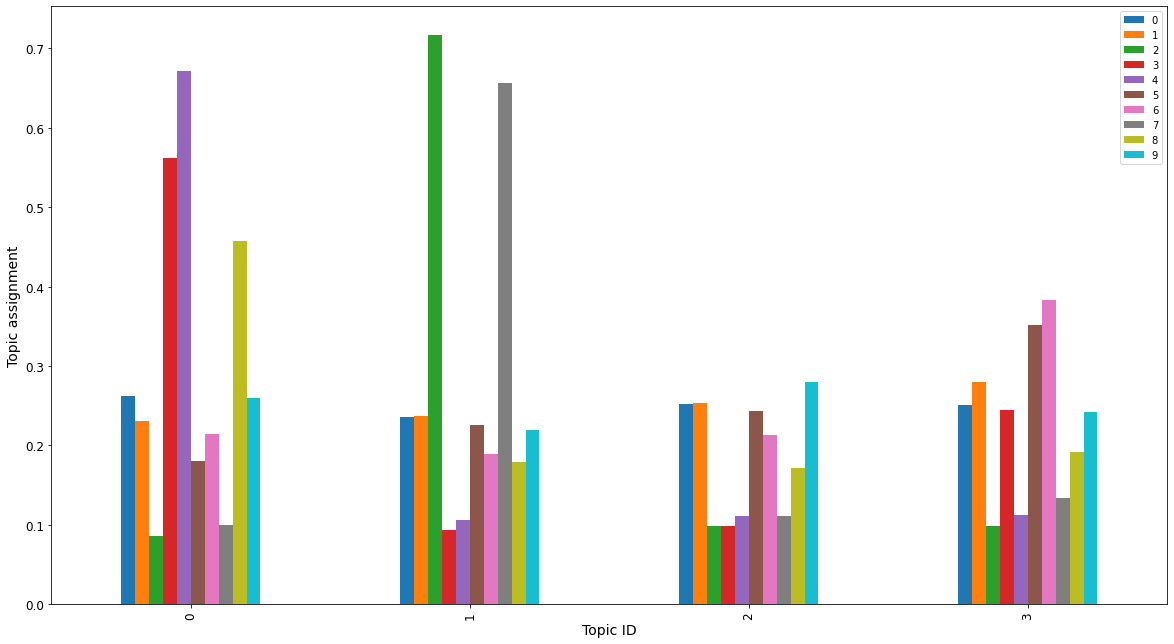

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

fs = 12
df=pd.DataFrame(predictions.T)
df.plot(kind='bar', figsize=(20, 11), fontsize=fs)
plt.ylabel('Topic assignment', fontsize=fs+2)
plt.xlabel('Topic ID', fontsize=fs+2)

## Delete endpoint after performing inferences
---

In [102]:
sagemaker.Session().delete_endpoint(ntm_predictor.endpoint_name)

2021-06-29 08:34:29,762 | INFO | session.py:3034 | delete_endpoint | Deleting endpoint with name: ntm-2021-06-29-08-15-12-353


## Load model artifacts stored in output directory
---

In [77]:
model_path = os.path.join(output_prefix, ntm._current_job_name, "output/model.tar.gz")
model_path

'sagemaker/regalado/output/ntm-2021-06-29-07-57-09-818/output/model.tar.gz'

In [78]:
boto3.resource("s3").Bucket(bucket).download_file(model_path, "downloaded_model.tar.gz")

In [79]:
!pwd

/home/ec2-user/SageMaker/my-experiments


In [80]:
tarfile.open('downloaded_model.tar.gz').extractall()

with zipfile.ZipFile('model_algo-1', 'r') as zip_ref:
    zip_ref.extractall('./')
    
model = mx.ndarray.load("params")
W = model["arg:projection_weight"]

## Model exploration
---

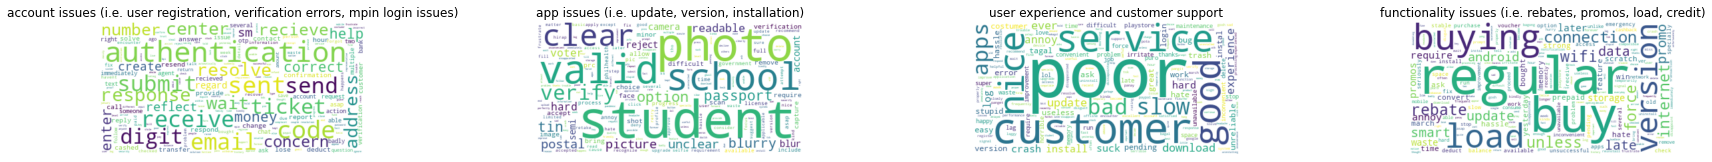

In [101]:
word_to_id = dict()

for i, v in enumerate(vocab_list):
    word_to_id[v] = i

limit = 30
n_col = 4
counter = 0

plt.figure(figsize=(30, 20))

for ind in range(num_topics):

    if counter >= limit:
        break
        
    title_str = topics[ind]
    pvals = mx.nd.softmax(mx.nd.array(W[:, ind])).asnumpy()
    word_freq = dict()
    
    for k in word_to_id.keys():
        i = word_to_id[k]
        word_freq[k] = pvals[i]

    wordcloud = wc.WordCloud(background_color="white").fit_words(word_freq)

    plt.subplot(limit // n_col, n_col, counter + 1)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title_str)

    counter += 1

## 1-star App Store model
---

In [39]:
sesh = sagemaker.Session()

ntm = sagemaker.estimator.Estimator(
    container,
    role, 
    instance_count=1, 
    instance_type='ml.m4.xlarge', # Free-tier instance (Free Tier usage per month for the first 2 months) ~ https://aws.amazon.com/sagemaker/pricing/
    output_path=output_path,
    sagemaker_session=sesh
)

num_topics = 3

ntm.set_hyperparameters(
    num_topics=num_topics, 
    feature_dim=vocab_size, 
    epochs=100, 
    batch_norm=True,
    sub_sample=0.2,
    encoder_layers_activation='relu',
    learning_rate=0.000845,
    mini_batch_size=1198,
    optimizer='sgd',
    rescale_gradient=0.874587,
    weight_decay=0.407700
)

In [40]:
print(f'vocab size = {vocab_size}')
print(f'topic count = {num_topics}')
print(f'\nplatform: {main_df.type.values[0]}\nrating: {main_df.rating.values[0]}')

vocab size = 519
topic count = 3

platform: app store
rating: 1


In [41]:
# WETC - The word embedding topic coherence metric measures the similarity of words in a topic by using a pre-trained word embedding, Glove-6B-400K-50d.
# TU - The topic unicity tells us how unique the word groups per topic are used overall (i.e. Are these meaningful words?)
# Note: A high (closer to 1) TU represents a high topic uniqueness for the topics detected.
# A high WETC value indicates a higher degree of topic coherence. A typical value would be in the range of 0.2 to 0.8

ntm.fit(inputs={"train": s3_train, "validation": s3_valid, "auxiliary": s3_aux_path})

2021-06-28 15:11:18,323 | INFO | image_uris.py:198 | _validate_version_and_set_if_needed | Defaulting to the only supported framework/algorithm version: latest.
2021-06-28 15:11:18,335 | INFO | image_uris.py:224 | _processor | Ignoring unnecessary instance type: None.
2021-06-28 15:11:18,337 | INFO | session.py:572 | train | Creating training-job with name: ntm-2021-06-28-15-11-18-322


2021-06-28 15:11:18 Starting - Starting the training job...
2021-06-28 15:11:20 Starting - Launching requested ML instancesProfilerReport-1624893078: InProgress
.........
2021-06-28 15:13:06 Starting - Preparing the instances for training......
2021-06-28 15:14:07 Downloading - Downloading input data...
2021-06-28 15:14:47 Training - Downloading the training image.Docker entrypoint called with argument(s): train
Running default environment configuration script
/opt/amazon/lib/python3.7/site-packages/jsonref.py:8: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping, MutableMapping, Sequence
[06/28/2021 15:14:55 INFO 140156929525568] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/default-input.json: {'encoder_layers': 'auto', 'mini_batch_size': '256', 'epochs': '50', 'encoder_layers_activation': 'sigmoid', 

## Deploy endpoint
---

In [42]:
ntm_predictor = ntm.deploy(initial_instance_count=1, instance_type='ml.m4.xlarge', wait=False)

2021-06-28 15:19:52,032 | INFO | session.py:2560 | create_model | Creating model with name: ntm-2021-06-28-15-19-51-951
2021-06-28 15:19:52,586 | INFO | session.py:2984 | create_endpoint | Creating endpoint with name ntm-2021-06-28-15-19-51-951


## Perform sample inferences
---

In [57]:
from sagemaker.serializers import CSVSerializer
from sagemaker.deserializers import JSONDeserializer

count = 10

# 1-star App Store topics
topics = ['account issues (i.e. authentication, verification, mpin login)', 'appeals for customer support', 'negative user experience']

predictor_2 = sagemaker.predictor.Predictor(
    endpoint_name=ntm_predictor.endpoint_name, 
    sagemaker_session=sesh, 
    serializer=CSVSerializer(), 
    deserializer=JSONDeserializer()
)

# predictor.update_endpoint()

results = predictor_2.predict(test_vectors[:count])
print(f'Raw prediction/s:\n{results}')

predictions = np.array([prediction['topic_weights'] for prediction in results['predictions']])
print(f'\nPredicted topic weights:\n{predictions}\n\nSorted topic assignment scores per input document:')

for i in results['predictions']:
    sorted_indexes = np.argsort(i['topic_weights']).tolist()
    sorted_indexes.reverse()
    top_topics = [topics[j] for j in sorted_indexes]
    top_weights = [i['topic_weights'][j] for j in sorted_indexes]
    pairs = list(zip(top_topics, top_weights))
    print(pairs)

Raw prediction/s:
{'predictions': [{'topic_weights': [0.3338592947, 0.3371211886, 0.3290195465]}, {'topic_weights': [0.3339159787, 0.336989224, 0.3290947974]}, {'topic_weights': [0.3338561952, 0.337216258, 0.3289275467]}, {'topic_weights': [0.3344165981, 0.3358984888, 0.3296848834]}, {'topic_weights': [0.333994627, 0.3367238045, 0.3292815387]}, {'topic_weights': [0.3338561952, 0.337216258, 0.3289275467]}, {'topic_weights': [0.3338561952, 0.337216258, 0.3289275467]}, {'topic_weights': [0.334544003, 0.3353593647, 0.3300966322]}, {'topic_weights': [0.3343494236, 0.3366118073, 0.3290387392]}, {'topic_weights': [0.3345556259, 0.3359101713, 0.3295342326]}]}

Predicted topic weights:
[[0.33385929 0.33712119 0.32901955]
 [0.33391598 0.33698922 0.3290948 ]
 [0.3338562  0.33721626 0.32892755]
 [0.3344166  0.33589849 0.32968488]
 [0.33399463 0.3367238  0.32928154]
 [0.3338562  0.33721626 0.32892755]
 [0.3338562  0.33721626 0.32892755]
 [0.334544   0.33535936 0.33009663]
 [0.33434942 0.33661181 0.

In [52]:
print(f'\noriginal text:')
for i in range(count):
    print(f'\n{[i]} - {test_data.review.values.tolist()[i]}')


original text:

[0] - I thought this would be a convenient app, but as for starters, beginners or just new to this app, it will completely waste your time. Tried to verify my account, app says for only 5 mins but it made me set it up for 30 because it keeps on denying my ID’s and info! Now I’m trying to verify my e-mail and they keep on popping out “Invalid Request”, when I am inputting the code that they sent to me which is 4 minutes late before you’ll receive it. Seriously its been almost 2 hours when I started setting up things into you application. This is beyond inconvenience and doesn’t help at all.

[1] - One of the problems I’ve encountered was paying my electric bill. The app keeps saying my account number is invalid but it isn’t, okay? I T  I S N ‘ T!!!!

[2] - Bring back the gaming credit!!

[3] - You have received P7742.00 of GCash from 7eleven Kiosk with MSG - 2110-3423-3349. A 2% service fee amounting to P158.00 has been deducted from your wallet for reaching the P8000.0

In [53]:
test_counts = pd.DataFrame(
    test_vectors[:count],
    columns=vocab_list
)

print(display(test_counts))

,able fund,accept student,access account,access money,account accept,account cash,account change,account crash,account debit,account deduct,account due,account forgot,account hack,account home,account iphone,account kept,account longer,account money,account number,account people,account postal,account pretty,account receive,account send,account send money,account tin,account turn,account update,account verification,account verify,account work,amount account,amount credit,amount deduct,amount deduct account,amount money,amount transaction,apple service,araw araw,ask assistance,ask detail,ask fill,ask fill form,ask information,ask question,ask refund,authentication code,authentication code send,automatically log,bad customer,bad customer service,bad ever,bad money,bad service,balance amount,balance upset,bank account,bank account deduct,bank card,bank send,bank transfer,bank transfer transaction,bank unavailable,basic user,become useless,big amount,bill payment,bill send,bpi amount,bpi amount deduct,bpi bank,bug money,button crash,buy load,buy load fix,card available,card bank,card cash,card found,cash bank,cash bpi,cash card,cash cash,cash fee,cash limit,cash option,cash paypal,cash transaction,cash union,cash union bank,cash-in bank,cash-in paypal,certain time,change number,chat support,cimb bank,click verify,click verify button,click verify fix,close ticket,code number,code send,code send email,code sent,code sent email,code text,code verify,code verify email,contact customer,contact customer service,continue paypal,continue paypal cash,convenience fee,costumer service,couldnt verify,crash click,crash click verify,crash fix,crash time,crash update,crash verify,create account,credit card,credit limit,customer customer,customer customer service,customer service,customer service ever,customer service poor,customer service recommend,customer service rep,customer service representative,customer service trash,customer support,customer support chat,debit card,debit card bank,deduct account,deduct balance,deduct balance upset,deduct bank,deduct money,deduct money account,download late,download late version,download pay,due date,earn money,email address,email code,email confirmation,email help,email receive,email response,email support,email support assistance,email time,email verification,email wait,error cash,error deduct,error log,error problem,error ticket,error upon,ever encounter,feature crash,feature work,fee charge,fee payment,fee transfer,fee transfer money,file dispute,file ticket,fill form,fill information,fix asap,fix bank,fix bank card,fix bug,fix inconvenient,fix issue,fix service,fix system,fix thanks,fix within,force people,force update,forever resolve,forgot mpin,fund transfer,gcredit limit,gcredit work,gscore decrease,gscore unlock,gscore unlock gcredit,hard earn,hard earn money,hard time,hard verify,havent reach,havent receive,havent receive card,help center,help fix,help save,help support,hold money,huge amount,ibalik pera,ilang ulit,information provide,input amount,input detail,internet connection,issue customer,issue customer support,issue regard,issue report,issue resolve,issue update,kahapon cash,kasi baka,keyboard pop,kind service,kindly fix,lag error,lagi nalang,large amount,large amount money,late update,late version,leave hang,leave review,limit remain,limit transaction,live chat,load amount,load available,load fix,load internet,load internet connection,load promo,load receive,load state,load transaction,load wifi,log account,log error,log fix,...,money log,money paymaya,money paypal,money someone,money transfer,money verify,mpin code,mukang pera,multiple time,nakaka stress,nawala sim,notification sent,number code,number sent,number transfer,online bank,online business,oops problem,option choose,option student,option update,option verification,option verification student,paki ayos,pandemic people,pay bill,pay bill send,pay due,pay online,pay transfer,paymaya account,paymaya gamit,paymaya instead,payment met

None


## Delete endpoint after performing inferences
---

In [60]:
sagemaker.Session().delete_endpoint(ntm_predictor.endpoint_name)

2021-06-28 15:34:51,767 | INFO | session.py:3034 | delete_endpoint | Deleting endpoint with name: ntm-2021-06-28-15-19-51-951


Text(0.5, 0, 'Topic ID')

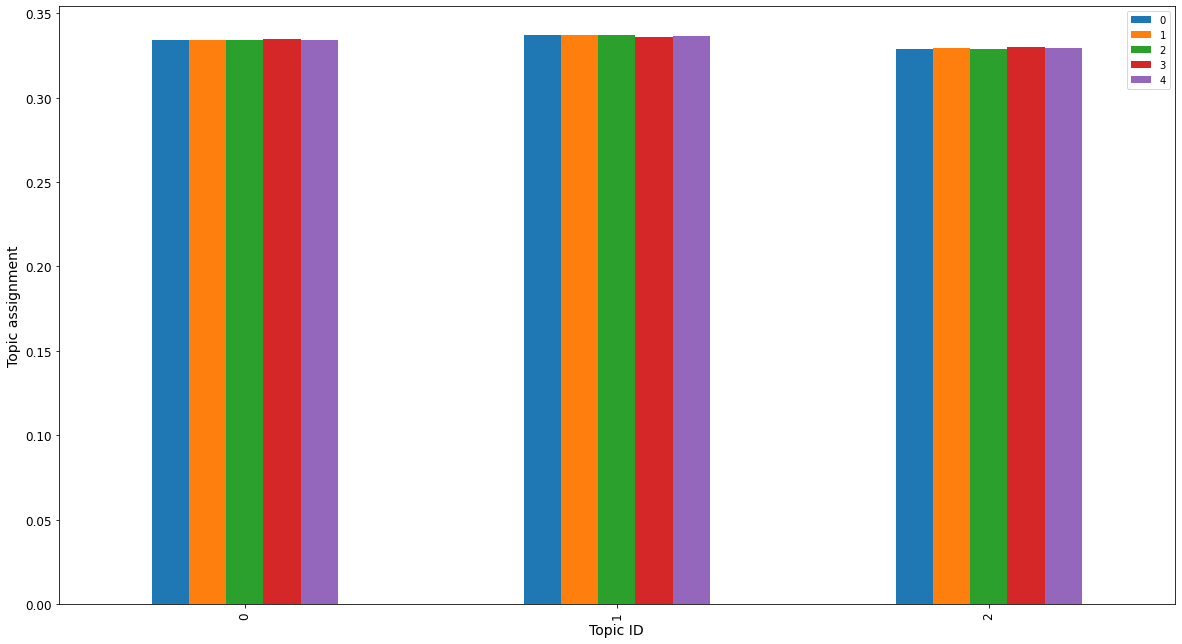

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

fs = 12
df=pd.DataFrame(predictions.T)
df.plot(kind='bar', figsize=(20, 11), fontsize=fs)
plt.ylabel('Topic assignment', fontsize=fs+2)
plt.xlabel('Topic ID', fontsize=fs+2)

## Load model artifacts stored in output directory
---

In [46]:
model_path = os.path.join(output_prefix, ntm._current_job_name, "output/model.tar.gz")
model_path

'sagemaker/regalado/output/ntm-2021-06-28-15-11-18-322/output/model.tar.gz'

In [47]:
boto3.resource("s3").Bucket(bucket).download_file(model_path, "downloaded_model.tar.gz")

In [48]:
!pwd

/home/ec2-user/SageMaker/my-experiments


In [49]:
tarfile.open('downloaded_model.tar.gz').extractall()

with zipfile.ZipFile('model_algo-1', 'r') as zip_ref:
    zip_ref.extractall('./')
    
model = mx.ndarray.load("params")
W = model["arg:projection_weight"]

## Model exploration
---

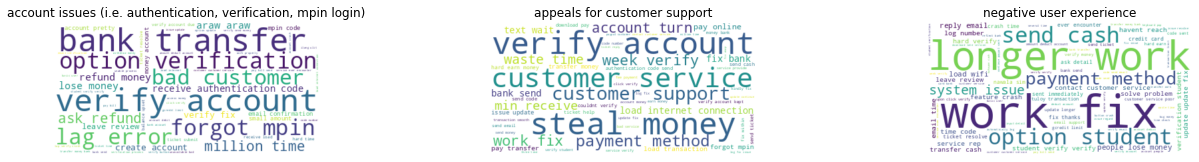

In [59]:
word_to_id = dict()

for i, v in enumerate(vocab_list):
    word_to_id[v] = i

limit = 30
n_col = 4
counter = 0

plt.figure(figsize=(30, 20))

for ind in range(num_topics):

    if counter >= limit:
        break
        
    title_str = topics[ind]
    pvals = mx.nd.softmax(mx.nd.array(W[:, ind])).asnumpy()
    word_freq = dict()
    
    for k in word_to_id.keys():
        i = word_to_id[k]
        word_freq[k] = pvals[i]

    wordcloud = wc.WordCloud(background_color="white").fit_words(word_freq)

    plt.subplot(limit // n_col, n_col, counter + 1)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title_str)

    counter += 1

## 5-star Play Store model
---

In [392]:
sesh = sagemaker.Session()

ntm = sagemaker.estimator.Estimator(
    container,
    role, 
    instance_count=1, 
    instance_type='ml.m4.xlarge', # Free-tier instance (Free Tier usage per month for the first 2 months) ~ https://aws.amazon.com/sagemaker/pricing/
    output_path=output_path,
    sagemaker_session=sesh
)

num_topics = 2

ntm.set_hyperparameters(
    num_topics=num_topics, 
    feature_dim=vocab_size, 
    epochs=100, 
    num_patience_epochs=5, 
    batch_norm=True,
    sub_sample=0.2,
    encoder_layers_activation='sigmoid',
    learning_rate=0.014080944527150089,
    mini_batch_size=1989,
    optimizer='adam',
    rescale_gradient=0.44133064053525295,
    weight_decay=0.32261615305350366
)

In [393]:
print(f'vocab size = {vocab_size}')
print(f'topic count = {num_topics}')
print(f'\nplatform: {main_df.type.values[0]}\nrating: {main_df.rating.values[0]}')

vocab size = 3099
topic count = 2

platform: play store
rating: 5


In [394]:
# WETC - The word embedding topic coherence metric measures the similarity of words in a topic by using a pre-trained word embedding, Glove-6B-400K-50d.
# TU - The topic unicity tells us how unique the word groups per topic are used overall (i.e. Are these meaningful words?)
# Note: A high (closer to 1) TU represents a high topic uniqueness for the topics detected.
# A high WETC value indicates a higher degree of topic coherence. A typical value would be in the range of 0.2 to 0.8

ntm.fit(inputs={"train": s3_train, "validation": s3_valid, "auxiliary": s3_aux_path})

2021-06-28 11:46:05,037 | INFO | image_uris.py:198 | _validate_version_and_set_if_needed | Defaulting to the only supported framework/algorithm version: latest.
2021-06-28 11:46:05,048 | INFO | image_uris.py:224 | _processor | Ignoring unnecessary instance type: None.
2021-06-28 11:46:05,049 | INFO | session.py:570 | train | Creating training-job with name: ntm-2021-06-28-11-46-05-036


2021-06-28 11:46:05 Starting - Starting the training job...
2021-06-28 11:46:07 Starting - Launching requested ML instancesProfilerReport-1624880765: InProgress
.........
2021-06-28 11:48:05 Starting - Preparing the instances for training......
2021-06-28 11:49:06 Downloading - Downloading input data...
2021-06-28 11:49:28 Training - Downloading the training image..Docker entrypoint called with argument(s): train
Running default environment configuration script
/opt/amazon/lib/python3.7/site-packages/jsonref.py:8: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping, MutableMapping, Sequence
[06/28/2021 11:49:52 INFO 140392893552448] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/default-input.json: {'encoder_layers': 'auto', 'mini_batch_size': '256', 'epochs': '50', 'encoder_layers_activation': 'sigmoid',

## Deploy endpoint
---

In [395]:
ntm_predictor = ntm.deploy(initial_instance_count=1, instance_type='ml.m4.xlarge', wait=False)

2021-06-28 11:58:38,667 | INFO | session.py:2552 | create_model | Creating model with name: ntm-2021-06-28-11-58-38-611
2021-06-28 11:58:39,181 | INFO | session.py:2973 | create_endpoint | Creating endpoint with name ntm-2021-06-28-11-58-38-611


## Perform sample inferences
---

In [396]:
from sagemaker.serializers import CSVSerializer
from sagemaker.deserializers import JSONDeserializer

count = 5

# 5-star Play Store
topics = ['good user experience', 'good user experience']
          
predictor_2 = sagemaker.predictor.Predictor(
    endpoint_name=ntm_predictor.endpoint_name, 
    sagemaker_session=sesh, 
    serializer=CSVSerializer(), 
    deserializer=JSONDeserializer()
)

# predictor.update_endpoint()

results = predictor_2.predict(test_vectors[:count])
print(f'Raw prediction/s:\n{results}')

predictions = np.array([prediction['topic_weights'] for prediction in results['predictions']])
print(f'\nPredicted topic weights:\n{predictions}\n\nSorted topic assignment scores per input document:')

for i in results['predictions']:
    sorted_indexes = np.argsort(i['topic_weights']).tolist()
    sorted_indexes.reverse()
    top_topics = [topics[j] for j in sorted_indexes]
    top_weights = [i['topic_weights'][j] for j in sorted_indexes]
    pairs = list(zip(top_topics, top_weights))
    print(pairs)

Raw prediction/s:
{'predictions': [{'topic_weights': [0.4996089041, 0.5003911257]}, {'topic_weights': [0.4984951615, 0.5015048385]}, {'topic_weights': [0.4996089041, 0.5003911257]}, {'topic_weights': [0.4996089041, 0.5003911257]}, {'topic_weights': [0.4996089041, 0.5003911257]}]}

Predicted topic weights:
[[0.4996089  0.50039113]
 [0.49849516 0.50150484]
 [0.4996089  0.50039113]
 [0.4996089  0.50039113]
 [0.4996089  0.50039113]]

Sorted topic assignment scores per input document:
[('good user experience', 0.5003911257), ('good user experience', 0.4996089041)]
[('good user experience', 0.5015048385), ('good user experience', 0.4984951615)]
[('good user experience', 0.5003911257), ('good user experience', 0.4996089041)]
[('good user experience', 0.5003911257), ('good user experience', 0.4996089041)]
[('good user experience', 0.5003911257), ('good user experience', 0.4996089041)]


In [397]:
print(f'\noriginal text:')
for i in range(count):
    print(f'\n{[i]} - {test_data.review.values.tolist()[i]}')


original text:

[0] - Good

[1] - Its good Apps

[2] - Nice I like it

[3] - Alright

[4] - Nice!


In [398]:
test_counts = pd.DataFrame(
    test_vectors[:count],
    columns=vocab_list
)

print(display(test_counts))

,able cash,able download,able money,able online,able pay,able update,absolutely perfect,accept payment,accept student,accept thanks,accepts payment,access account,access bank,access bill,access easy,access money,access number,access pay,access payment,access transaction,access transfer,accessible anytime,accessible anywhere,accessible easy,accessible fast,accessible friendly,accessible pay,accessible time,account account,account apps,account cash,account consider,account contact,account credit,account deduct,account easy,account forgot,account good,account great,account help,account load,account lock,account log,account mastercard,account nice,account number,account online,account pay,account pending,account receive,account recommend,account semi,account send,account service,account student,account thanks,account time,account tin,account transfer,account update,account useful,account verify,account wait,account work,active account,actually apps,address concern,address number,afford easy,ago work,ahead time,akong account,akong experience,akong ibang,akong pera,akong problema,akong valid,allow transaction,allow verify,alot money,alot specially,alot time,amaze application,amaze apps,amaze big,amaze cash,amaze cashless,amaze convenient,amaze easy,amaze fast,amaze feature,amaze great,amaze hassle,amaze helpful,amaze love,amaze money,amaze nice,amaze pay,amaze reliable,amaze save,amaze service,amaze thanks,amaze update,amaze useful,amex card,among rest,amount cash,amount transfer,annoy update,answer query,anyone anywhere,anytime anywhere,anytime load,anytime thanks,anytime transfer,anywhere anytime,anywhere else,anywhere send,anywhere thanks,app.is good,app.the best,app.very helpful,application cash,application convenient,application easy,application ever,application excellent,application good,application great,application help,application helpful,application love,application nice,application online,application thanks,application useful,appreciate apps,appreciate customer,approve approve,apps amaze,apps apps,apps awesome,apps best,apps big,apps bill,apps buy,apps buying,apps cash,apps convenience,apps convenient,apps convience,apps convinient,apps easily,apps easy,apps ever,apps everyone,apps excellent,apps fast,apps five,apps free,apps good,apps great,apps hassle,apps help,apps helpful,apps helpfull,apps highly,apps ilove,apps legit,apps less,apps likely,apps load,apps love,apps madali,apps mobile,apps money,apps nato,apps nice,apps online,apps pandemic,apps pay,apps payment,apps perfect,apps power,apps problem,apps rate,apps real,apps rebate,apps right,apps salamat,apps satisfied,apps save,apps saving,apps secure,apps send,apps share,apps specially,apps term,apps thanks,apps thankyou,apps time,apps tnx,apps transaction,apps transfer,apps two,apps update,apps usable,apps useful,apps user,apps wallet,apps work,apps worry,april update,araw araw,ask email,ask fix,ask lng,ask provide,ask update,atm bank,atm card,atm easy,atm machine,authentication code,available verify,avoid hassle,away thanks,awesome amaze,awesome application,awesome apps,awesome convenient,awesome convinient,awesome easy,awesome experience,awesome fast,awesome feature,awesome good,awesome great,awesome helpful,awesome less,awesome love,awesome mobile,awesome nice,awesome service,awesome thanks,awesome useful,awsome good,awsome useful,awts gege,ayaw gumana,...,transfer good,transfer international,transfer little,transfer load,transfer money,transfer pay,transfer payment,transfer pera,transfer receive,transfer regular,transfer save,transfer send,transfer successful,transfer transaction,transfer user,transper money,trasfer money,tree anyway,tree grow,tree plant,trip lng,trouble opening,tru paypal,truly helpful,trust application,trust apps,trust convenient,trust money,trust percent,tulong lalo,tulong pagbayad,tulong pamilya,tulong saakin,tulong sakin,tulong talaga,two ago,two thumb,two thump,unable buy,unavailable fix,uninstall install,union bank,update able,update accou

None


## Delete endpoint after performing inferences
---

In [343]:
sagemaker.Session().delete_endpoint(ntm_predictor.endpoint_name)

2021-06-26 10:19:42,640 | INFO | session.py:3023 | delete_endpoint | Deleting endpoint with name: ntm-2021-06-26-10-09-44-420


Text(0.5, 0, 'Topic ID')

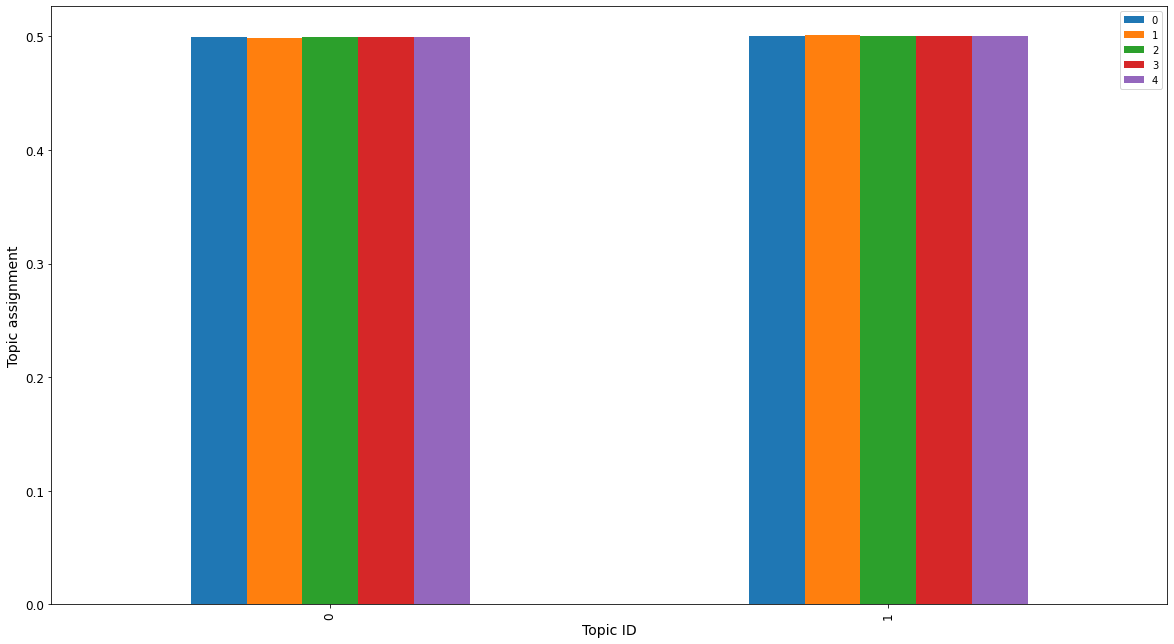

In [399]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

fs = 12
df=pd.DataFrame(predictions.T)
df.plot(kind='bar', figsize=(20, 11), fontsize=fs)
plt.ylabel('Topic assignment', fontsize=fs+2)
plt.xlabel('Topic ID', fontsize=fs+2)

## Load model artifacts stored in output directory
---

In [400]:
model_path = os.path.join(output_prefix, ntm._current_job_name, "output/model.tar.gz")
model_path

'sagemaker/regalado/output/ntm-2021-06-28-11-46-05-036/output/model.tar.gz'

In [401]:
boto3.resource("s3").Bucket(bucket).download_file(model_path, "downloaded_model.tar.gz")

In [402]:
!pwd

/home/ec2-user/SageMaker/my-experiments


In [403]:
tarfile.open('downloaded_model.tar.gz').extractall()

with zipfile.ZipFile('model_algo-1', 'r') as zip_ref:
    zip_ref.extractall('./')
    
model = mx.ndarray.load("params")
W = model["arg:projection_weight"]

## Model exploration
---

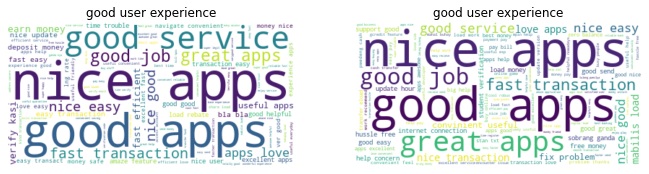

In [405]:
word_to_id = dict()

for i, v in enumerate(vocab_list):
    word_to_id[v] = i

limit = 30
n_col = 5
counter = 0

plt.figure(figsize=(30, 20))

for ind in range(num_topics):

    if counter >= limit:
        break
        
    title_str = topics[ind]
    pvals = mx.nd.softmax(mx.nd.array(W[:, ind])).asnumpy()
    word_freq = dict()
    
    for k in word_to_id.keys():
        i = word_to_id[k]
        word_freq[k] = pvals[i]

    wordcloud = wc.WordCloud(background_color="white").fit_words(word_freq)

    plt.subplot(limit // n_col, n_col, counter + 1)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title_str)

    counter += 1

## 5-star App Store model
---

In [517]:
sesh = sagemaker.Session()

ntm = sagemaker.estimator.Estimator(
    container,
    role, 
    instance_count=1, 
    instance_type='ml.m4.xlarge', # Free-tier instance (Free Tier usage per month for the first 2 months) ~ https://aws.amazon.com/sagemaker/pricing/
    output_path=output_path,
    sagemaker_session=sesh
)

num_topics = 2

ntm.set_hyperparameters(
    num_topics=num_topics, 
    feature_dim=vocab_size, 
    epochs=100, 
    num_patience_epochs=5, 
    batch_norm=True,
    sub_sample=0.2,
    encoder_layers_activation='sigmoid',
    learning_rate=0.004531,
    mini_batch_size=2042,
    optimizer='adadelta',
    rescale_gradient=0.621600,
    weight_decay=0.286122
)

In [518]:
print(f'vocab size = {vocab_size}')
print(f'topic count = {num_topics}')
print(f'\nplatform: {main_df.type.values[0]}\nrating: {main_df.rating.values[0]}')

vocab size = 90
topic count = 2

platform: app store
rating: 5


In [519]:
# WETC - The word embedding topic coherence metric measures the similarity of words in a topic by using a pre-trained word embedding, Glove-6B-400K-50d.
# TU - The topic unicity tells us how unique the word groups per topic are used overall (i.e. Are these meaningful words?)
# Note: A high (closer to 1) TU represents a high topic uniqueness for the topics detected.
# A high WETC value indicates a higher degree of topic coherence. A typical value would be in the range of 0.2 to 0.8

ntm.fit(inputs={"train": s3_train, "validation": s3_valid, "auxiliary": s3_aux_path})

2021-06-28 13:14:48,279 | INFO | image_uris.py:198 | _validate_version_and_set_if_needed | Defaulting to the only supported framework/algorithm version: latest.
2021-06-28 13:14:48,291 | INFO | image_uris.py:224 | _processor | Ignoring unnecessary instance type: None.
2021-06-28 13:14:48,292 | INFO | session.py:570 | train | Creating training-job with name: ntm-2021-06-28-13-14-48-278


2021-06-28 13:14:48 Starting - Starting the training job...
2021-06-28 13:15:11 Starting - Launching requested ML instancesProfilerReport-1624886088: InProgress
......
2021-06-28 13:16:12 Starting - Preparing the instances for training.........
2021-06-28 13:17:39 Downloading - Downloading input data
2021-06-28 13:17:39 Training - Downloading the training image....Docker entrypoint called with argument(s): train
Running default environment configuration script
/opt/amazon/lib/python3.7/site-packages/jsonref.py:8: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping, MutableMapping, Sequence
[06/28/2021 13:18:24 INFO 140319327283008] Reading default configuration from /opt/amazon/lib/python3.7/site-packages/algorithm/default-input.json: {'encoder_layers': 'auto', 'mini_batch_size': '256', 'epochs': '50', 'encoder_layers_activation': 'sigmoid', 

In [473]:
# WETC - The word embedding topic coherence metric measures the similarity of words in a topic by using a pre-trained word embedding, Glove-6B-400K-50d.
# TU - The topic unicity tells us how unique the word groups per topic are used overall (i.e. Are these meaningful words?)
# Note: A high (closer to 1) TU represents a high topic uniqueness for the topics detected.
# A high WETC value indicates a higher degree of topic coherence. A typical value would be in the range of 0.2 to 0.8

ntm.fit(inputs={"train": s3_train, "validation": s3_valid, "auxiliary": s3_aux_path})

2021-06-28 12:49:06,709 | INFO | image_uris.py:198 | _validate_version_and_set_if_needed | Defaulting to the only supported framework/algorithm version: latest.
2021-06-28 12:49:06,721 | INFO | image_uris.py:224 | _processor | Ignoring unnecessary instance type: None.
2021-06-28 12:49:06,723 | INFO | session.py:570 | train | Creating training-job with name: ntm-2021-06-28-12-49-06-709


2021-06-28 12:49:06 Starting - Starting the training job...
2021-06-28 12:49:08 Starting - Launching requested ML instancesProfilerReport-1624884546: InProgress
...
2021-06-28 12:50:06 Starting - Insufficient capacity error from EC2 while launching instances, retrying!.........
2021-06-28 12:51:34 Starting - Preparing the instances for training.........
2021-06-28 12:53:07 Downloading - Downloading input data
2021-06-28 12:53:07 Training - Downloading the training image...
2021-06-28 12:53:38 Training - Training image download completed. Training in progress..Docker entrypoint called with argument(s): train
Running default environment configuration script
/opt/amazon/lib/python3.7/site-packages/jsonref.py:8: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping, MutableMapping, Sequence
[06/28/2021 12:53:40 INFO 140397365749568] Reading default

## Deploy endpoint
---

In [474]:
ntm_predictor = ntm.deploy(initial_instance_count=1, instance_type='ml.m4.xlarge', wait=False)

2021-06-28 12:58:16,892 | INFO | session.py:2552 | create_model | Creating model with name: ntm-2021-06-28-12-58-16-752
2021-06-28 12:58:17,589 | INFO | session.py:2973 | create_endpoint | Creating endpoint with name ntm-2021-06-28-12-58-16-752


## Perform sample inferences
---

In [480]:
from sagemaker.serializers import CSVSerializer
from sagemaker.deserializers import JSONDeserializer

count = 5

# 5-star App Store topics
topics = ['positive user experience', 'maintenance requests and general inquiries'] 
# 1-star App Store topics
# topics = ['account issues (i.e. user registration, verification errors, mpin login issues)', 'app crashes, customer support, transaction errors'] 
# 1-star Play Store
# topics = ['account issues (i.e. user registration, verification errors, mpin login issues)', \
#           'app issues (i.e. update, version, installation)', 'user experience and customer support', 'functionality issues (i.e. rebates, promos, load, credit)']
# 5-star Play Store
# topics = ['good user experience', 'good user experience']
          
predictor_2 = sagemaker.predictor.Predictor(
    endpoint_name=ntm_predictor.endpoint_name, 
    sagemaker_session=sesh, 
    serializer=CSVSerializer(), 
    deserializer=JSONDeserializer()
)

# predictor.update_endpoint()

results = predictor_2.predict(test_vectors[:count])
print(f'Raw prediction/s:\n{results}')

predictions = np.array([prediction['topic_weights'] for prediction in results['predictions']])
print(f'\nPredicted topic weights:\n{predictions}\n\nSorted topic assignment scores per input document:')

for i in results['predictions']:
    sorted_indexes = np.argsort(i['topic_weights']).tolist()
    sorted_indexes.reverse()
    top_topics = [topics[j] for j in sorted_indexes]
    top_weights = [i['topic_weights'][j] for j in sorted_indexes]
    pairs = list(zip(top_topics, top_weights))
    print(pairs)

Raw prediction/s:
{'predictions': [{'topic_weights': [0.5096023679, 0.4903976321]}, {'topic_weights': [0.5096023679, 0.4903976321]}, {'topic_weights': [0.5096023679, 0.4903976321]}, {'topic_weights': [0.5096023679, 0.4903976321]}, {'topic_weights': [0.5096023679, 0.4903976321]}]}

Predicted topic weights:
[[0.50960237 0.49039763]
 [0.50960237 0.49039763]
 [0.50960237 0.49039763]
 [0.50960237 0.49039763]
 [0.50960237 0.49039763]]

Sorted topic assignment scores per input document:
[('positive user experience', 0.5096023679), ('maintenance requests and general inquiries', 0.4903976321)]
[('positive user experience', 0.5096023679), ('maintenance requests and general inquiries', 0.4903976321)]
[('positive user experience', 0.5096023679), ('maintenance requests and general inquiries', 0.4903976321)]
[('positive user experience', 0.5096023679), ('maintenance requests and general inquiries', 0.4903976321)]
[('positive user experience', 0.5096023679), ('maintenance requests and general inquiri

In [481]:
print(f'\noriginal text:')
for i in range(count):
    print(f'\n{[i]} - {test_data.review.values.tolist()[i]}')


original text:

[0] - Hi GCash ask ko lang po if pano marerecover yung ATM ko kahit wala na po yung dati kong number? Really need lang po please answer.

[1] - During the lockdown i thought i wouldnt be able to get my money that was sent by mistake to a wrong number, i just sent an email since i know contact call centers does not have full workforce so i will not be able to go through, true enough few emails sent and I got my money back

[2] - From money transfer to savings to investing.

[3] - I love the convenience the app gives. I just wish the developers would create like a running meter or something that would visiually show how much you’re on the daily and monthly limits. Since I use this app a lot, that would be a great enhancement

[4] - Payments, money transfers, savings, credit, insurance... it has everything I would normally need a bank or credit card for.

I've pretty much stopped using my credit card and other online banking services since I got on GCash.


In [482]:
test_counts = pd.DataFrame(
    test_vectors[:count],
    columns=vocab_list
)

print(display(test_counts))

,able,able pay,access,account,actually,amount,apps,available,bank,best,bill,bill pay,buy,buy load,call,card,cash,cashless,contact,convenience,convenient,customer,customer service,data,date,different,easy,encounter,error,experience,fast,fee,fix,free,fund,gcredit,good,great,gsave,help,invest,issue,load,love,mastercard,money,number,online,pandemic,pay,pay bill,payment,per,perfect,peso,peso per,pin,power,problem,process,produce,rebate,return,review,save,saving,send,service,small,smart,smooth,store,term,thanks,tho,time,transaction,transfer,transfer fund,unavailable,update,useful,user,user friendly,verify,verify account,version,wait,wallet,week
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.676189,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.319803,0.000000,0.0,0.0,0.338094,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.482958,0.304858,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.598689,0.0,0.0,0.000000,0.0,0.399724,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.559654,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.410585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.59291,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.621976,0.0,0.0,0.000000,0.0,0.0,0.511472,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.266087,0.0,0.0,0.0,0.0,0.0,0.000000,0.609442,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.251807,0.000000,0.317897,0.0,0.0,0.0,0.317897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.352555,0.0,0.317897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.258649,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


None


## Delete endpoint after performing inferences
---

In [489]:
sagemaker.Session().delete_endpoint(ntm_predictor.endpoint_name)

2021-06-28 13:09:45,557 | INFO | session.py:3023 | delete_endpoint | Deleting endpoint with name: ntm-2021-06-28-12-58-16-752


Text(0.5, 0, 'Topic ID')

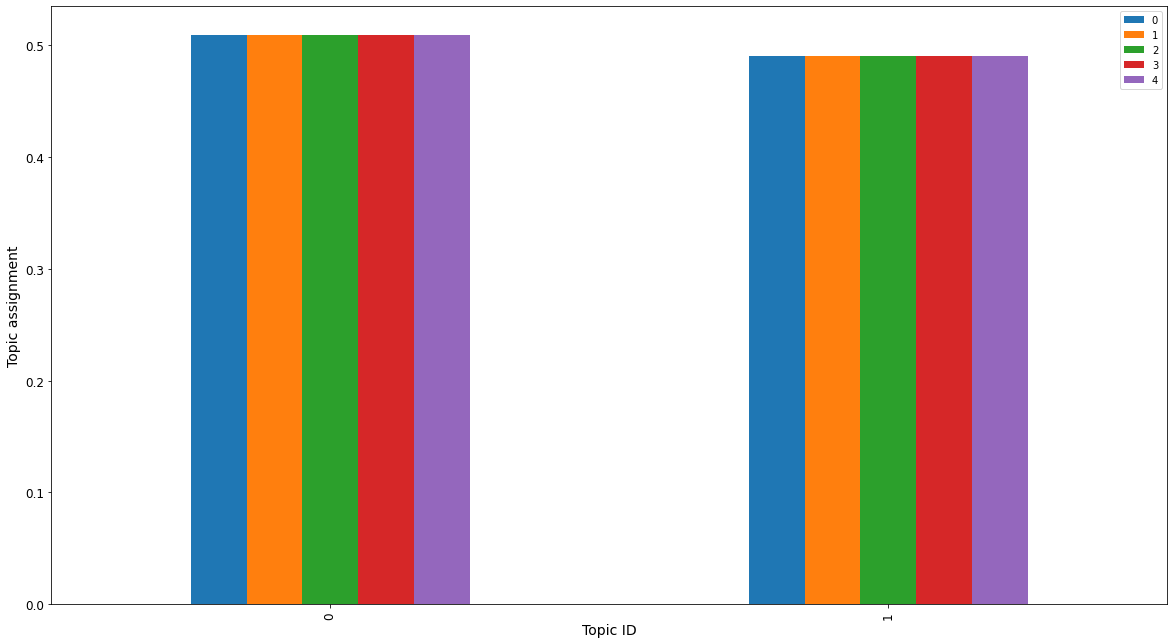

In [483]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

fs = 12
df=pd.DataFrame(predictions.T)
df.plot(kind='bar', figsize=(20, 11), fontsize=fs)
plt.ylabel('Topic assignment', fontsize=fs+2)
plt.xlabel('Topic ID', fontsize=fs+2)

## Load model artifacts stored in output directory
---

In [484]:
model_path = os.path.join(output_prefix, ntm._current_job_name, "output/model.tar.gz")
model_path

'sagemaker/regalado/output/ntm-2021-06-28-12-49-06-709/output/model.tar.gz'

In [485]:
boto3.resource("s3").Bucket(bucket).download_file(model_path, "downloaded_model.tar.gz")

In [486]:
!pwd

/home/ec2-user/SageMaker/my-experiments


In [487]:
tarfile.open('downloaded_model.tar.gz').extractall()

with zipfile.ZipFile('model_algo-1', 'r') as zip_ref:
    zip_ref.extractall('./')
    
model = mx.ndarray.load("params")
W = model["arg:projection_weight"]

## Model exploration
---

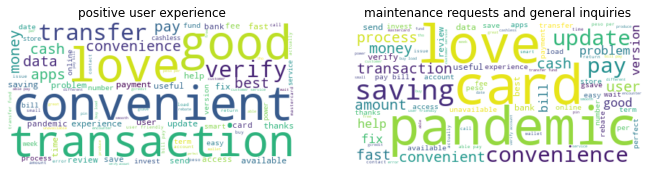

In [488]:
word_to_id = dict()

for i, v in enumerate(vocab_list):
    word_to_id[v] = i

limit = 30
n_col = 5
counter = 0

plt.figure(figsize=(30, 20))

for ind in range(num_topics):

    if counter >= limit:
        break
        
    title_str = topics[ind]
    pvals = mx.nd.softmax(mx.nd.array(W[:, ind])).asnumpy()
    word_freq = dict()
    
    for k in word_to_id.keys():
        i = word_to_id[k]
        word_freq[k] = pvals[i]

    wordcloud = wc.WordCloud(background_color="white").fit_words(word_freq)

    plt.subplot(limit // n_col, n_col, counter + 1)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title_str)

    counter += 1